In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Task 1: Data Exploration

In [2]:
#target column is 'survived' .which indicates wheather a passenger survived or not (1 for survived and 0 for not survived)
titanic_train_data=pd.read_csv("/content/Titanic_train.csv")
titanic_train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic_test_data=pd.read_csv("/content/Titanic_test.csv")
titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
titanic_train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#some columns are not useful for prediction so we deleted that columns.
columns_to_drop=['PassengerId','Name','Ticket','Cabin']
titanic_train_data.drop(columns=columns_to_drop, inplace=True)
titanic_test_data.drop(columns=columns_to_drop, inplace=True)

In [6]:
titanic_train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_train_data.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


Task 2: Data Preprocessing

In [8]:
titanic_train_data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [9]:
titanic_test_data.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [10]:
len(titanic_train_data)

891

In [11]:
len(titanic_test_data)

418

In [12]:
#Calculate the percentage of missig values in each column.
for i in titanic_train_data.isnull().sum():
    print((i/len(titanic_train_data))*100,'%')

0.0 %
0.0 %
0.0 %
19.865319865319865 %
0.0 %
0.0 %
0.0 %
0.22446689113355783 %


In [13]:
for i in titanic_test_data.isnull().sum():
    print((i/len(titanic_test_data))*100,'%')

0.0 %
0.0 %
20.574162679425836 %
0.0 %
0.0 %
0.23923444976076555 %
0.0 %


In [14]:
titanic_train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [15]:
titanic_test_data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [16]:
Embarked_mode=titanic_train_data['Embarked'].mode()[0]
Embarked_mode

'S'

In [17]:
Age_median = titanic_train_data['Age'].median()
Age_median

28.0

In [18]:
Age_median = titanic_test_data['Age'].median()
Age_median

27.0

In [19]:
Fare_median = titanic_test_data['Fare'].median()
Fare_median

14.4542

In [20]:
titanic_train_data['Age'].fillna(Age_median, inplace=True)

In [21]:
titanic_test_data['Age'].fillna(Age_median, inplace=True)

In [22]:
titanic_test_data['Fare'].fillna(Fare_median, inplace=True)

In [23]:
titanic_train_data['Embarked'].fillna(Embarked_mode, inplace=True)

In [24]:
titanic_train_data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [25]:
titanic_test_data.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


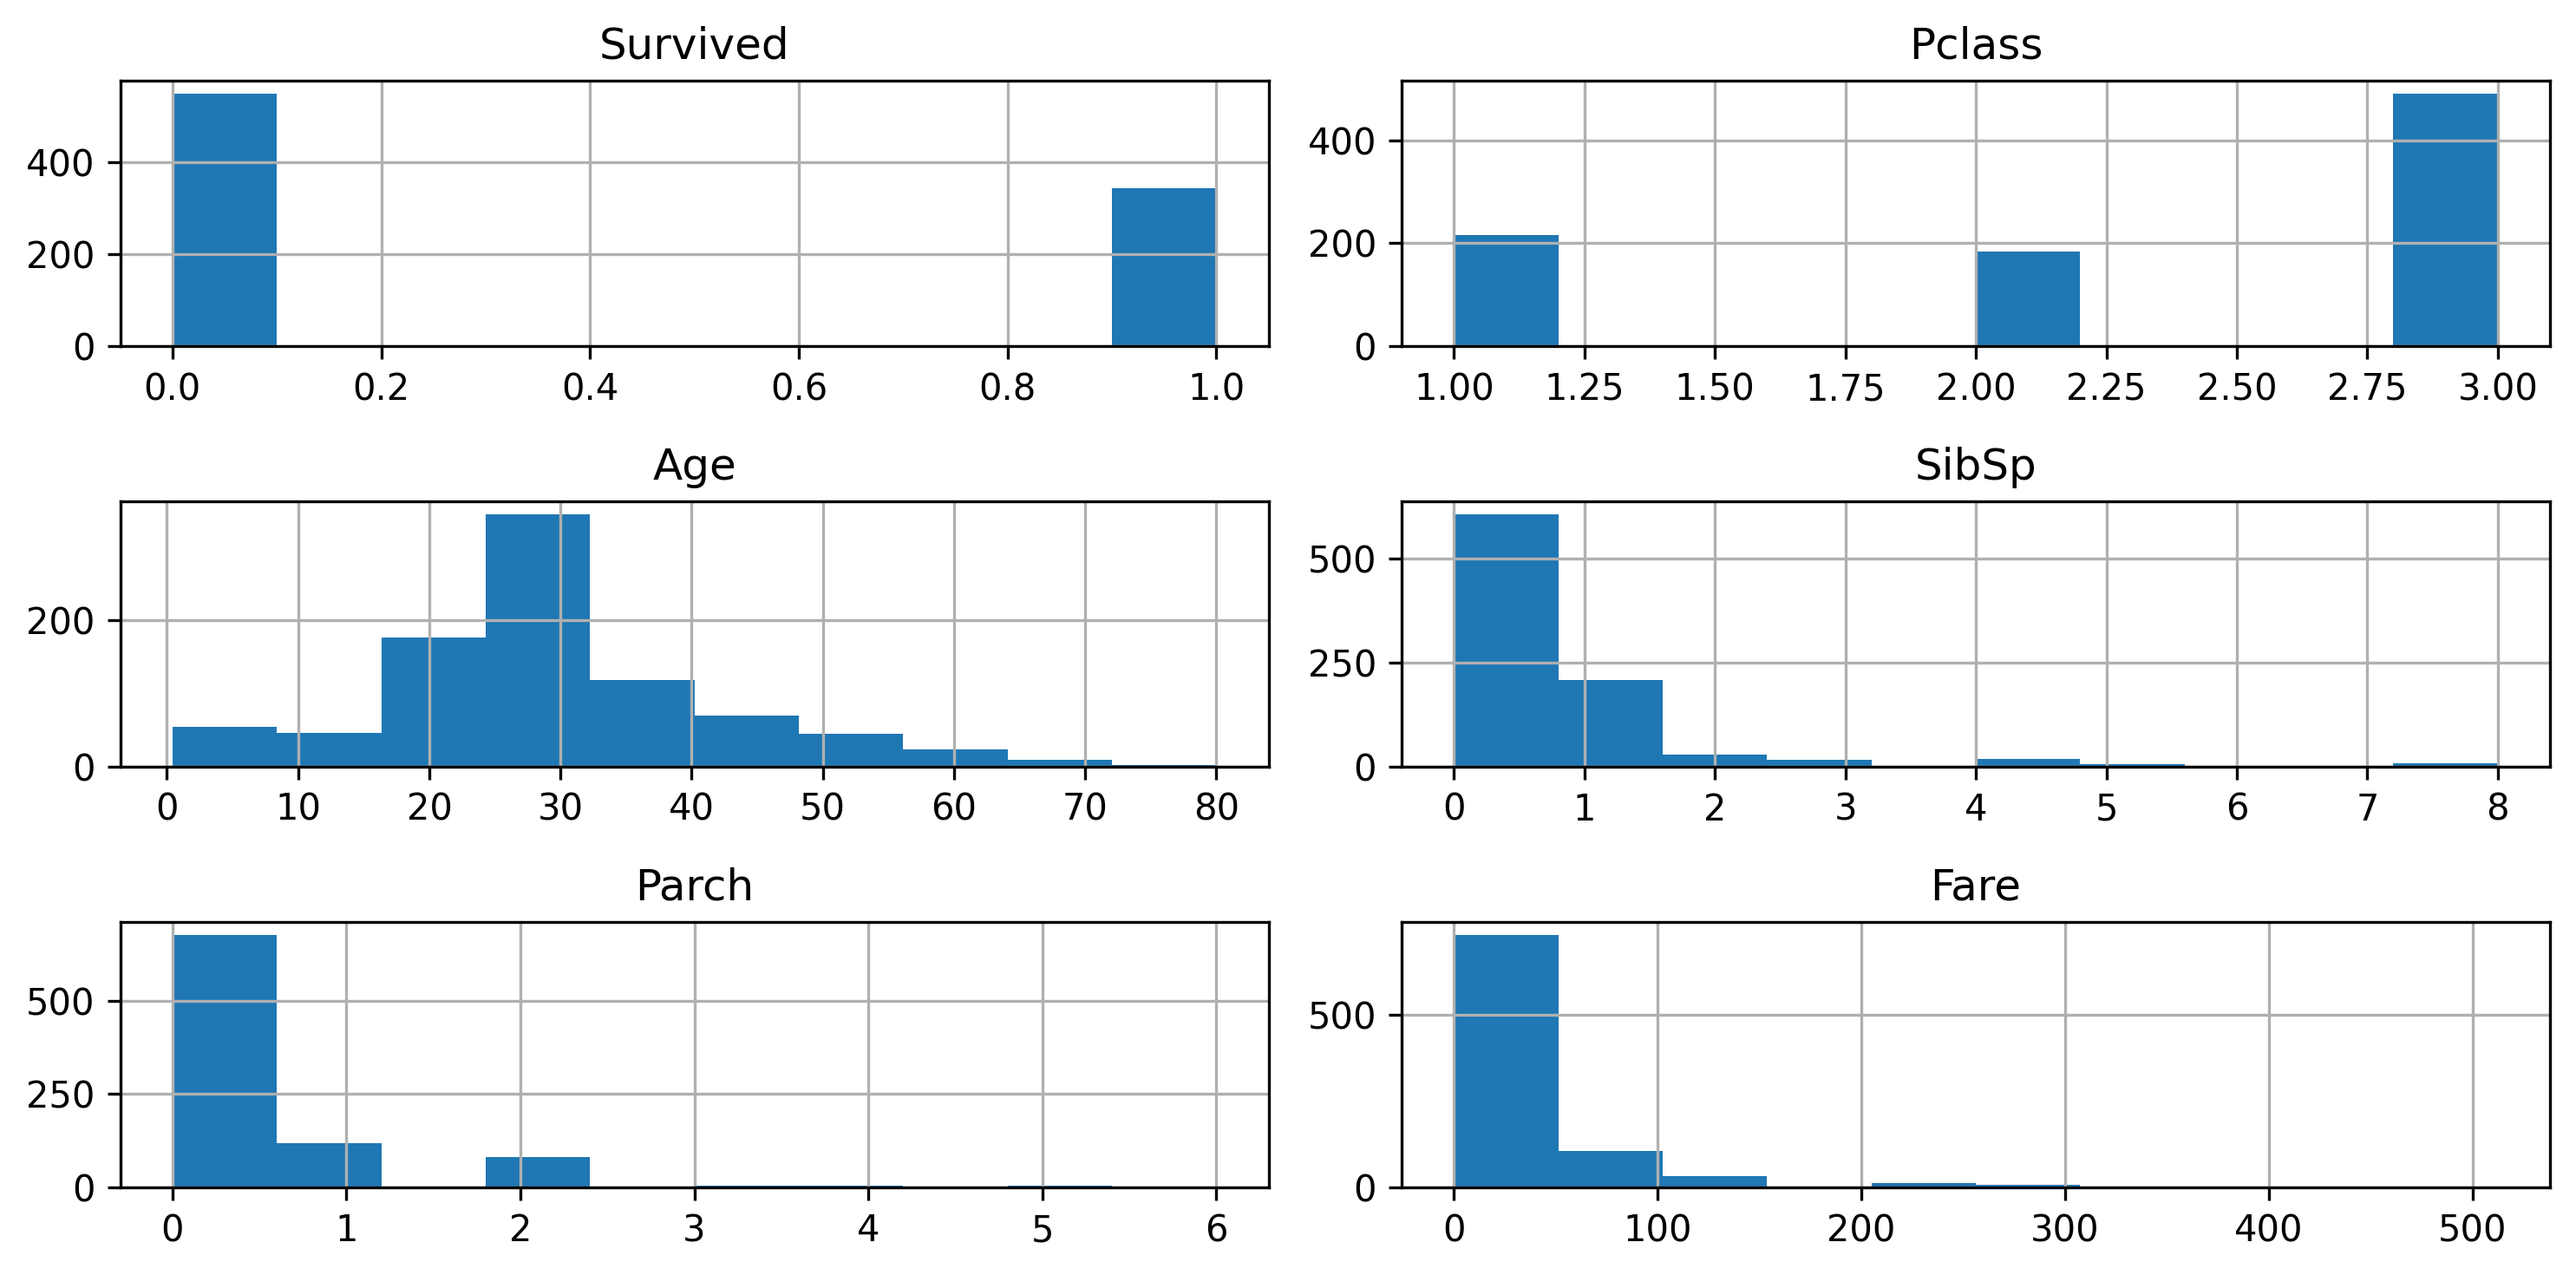

In [26]:
#outlier detection
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
titanic_train_data.hist()
plt.tight_layout()

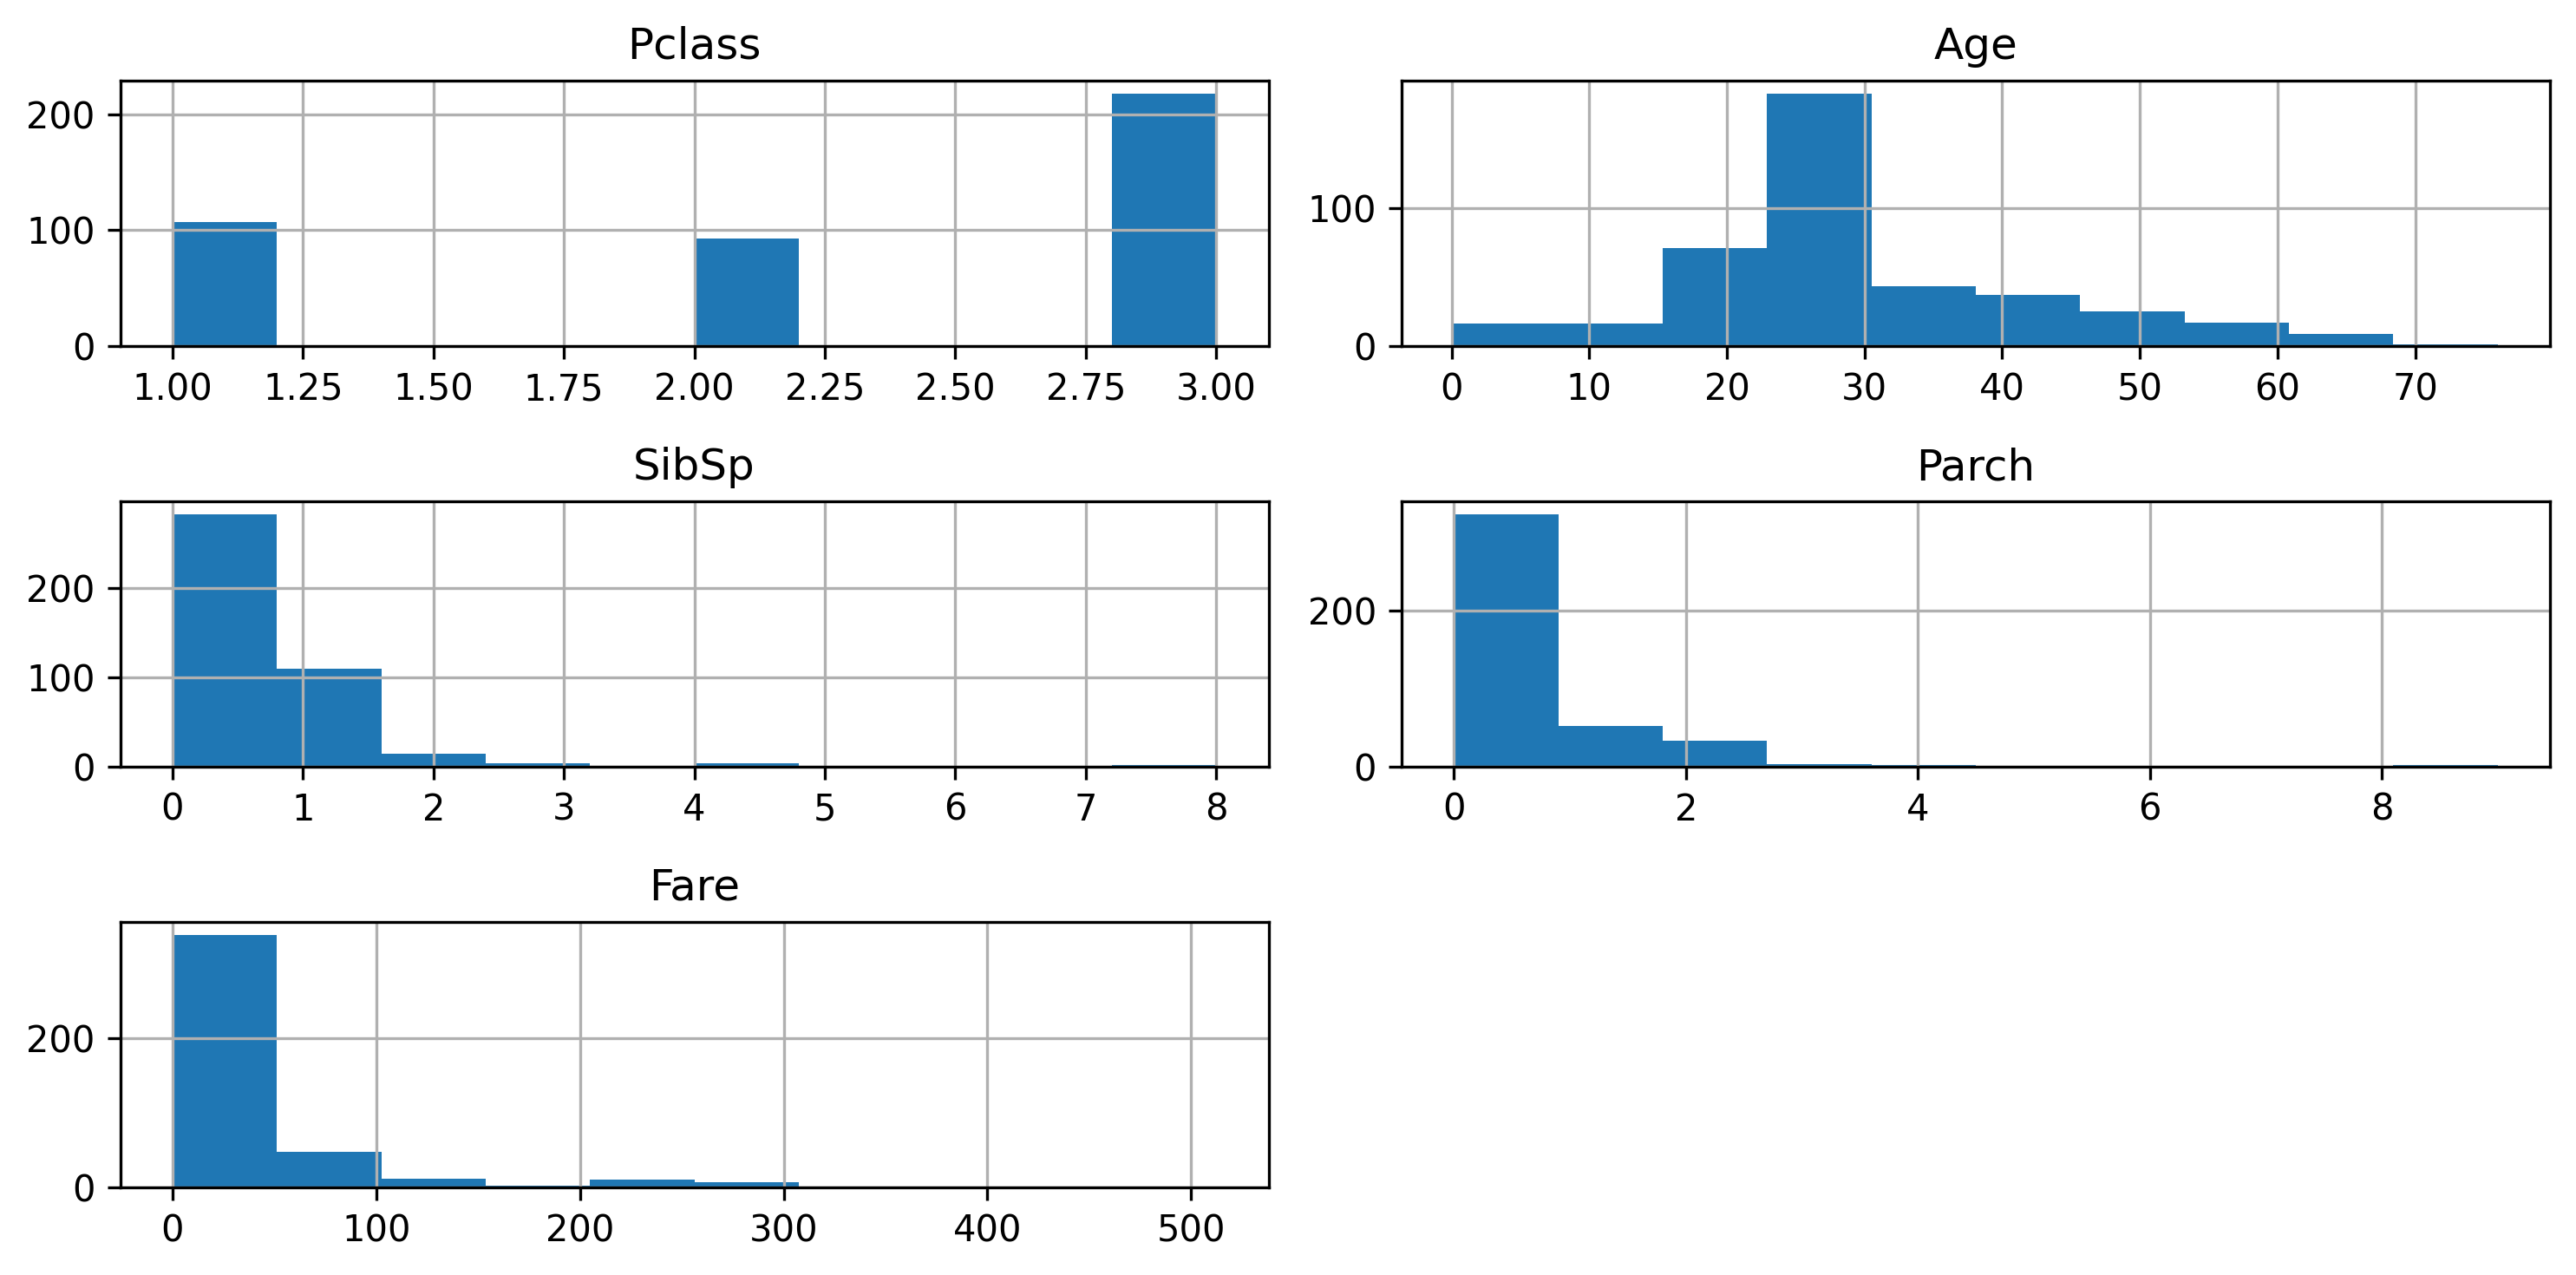

In [27]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
titanic_test_data.hist()
plt.tight_layout()

<Axes: >

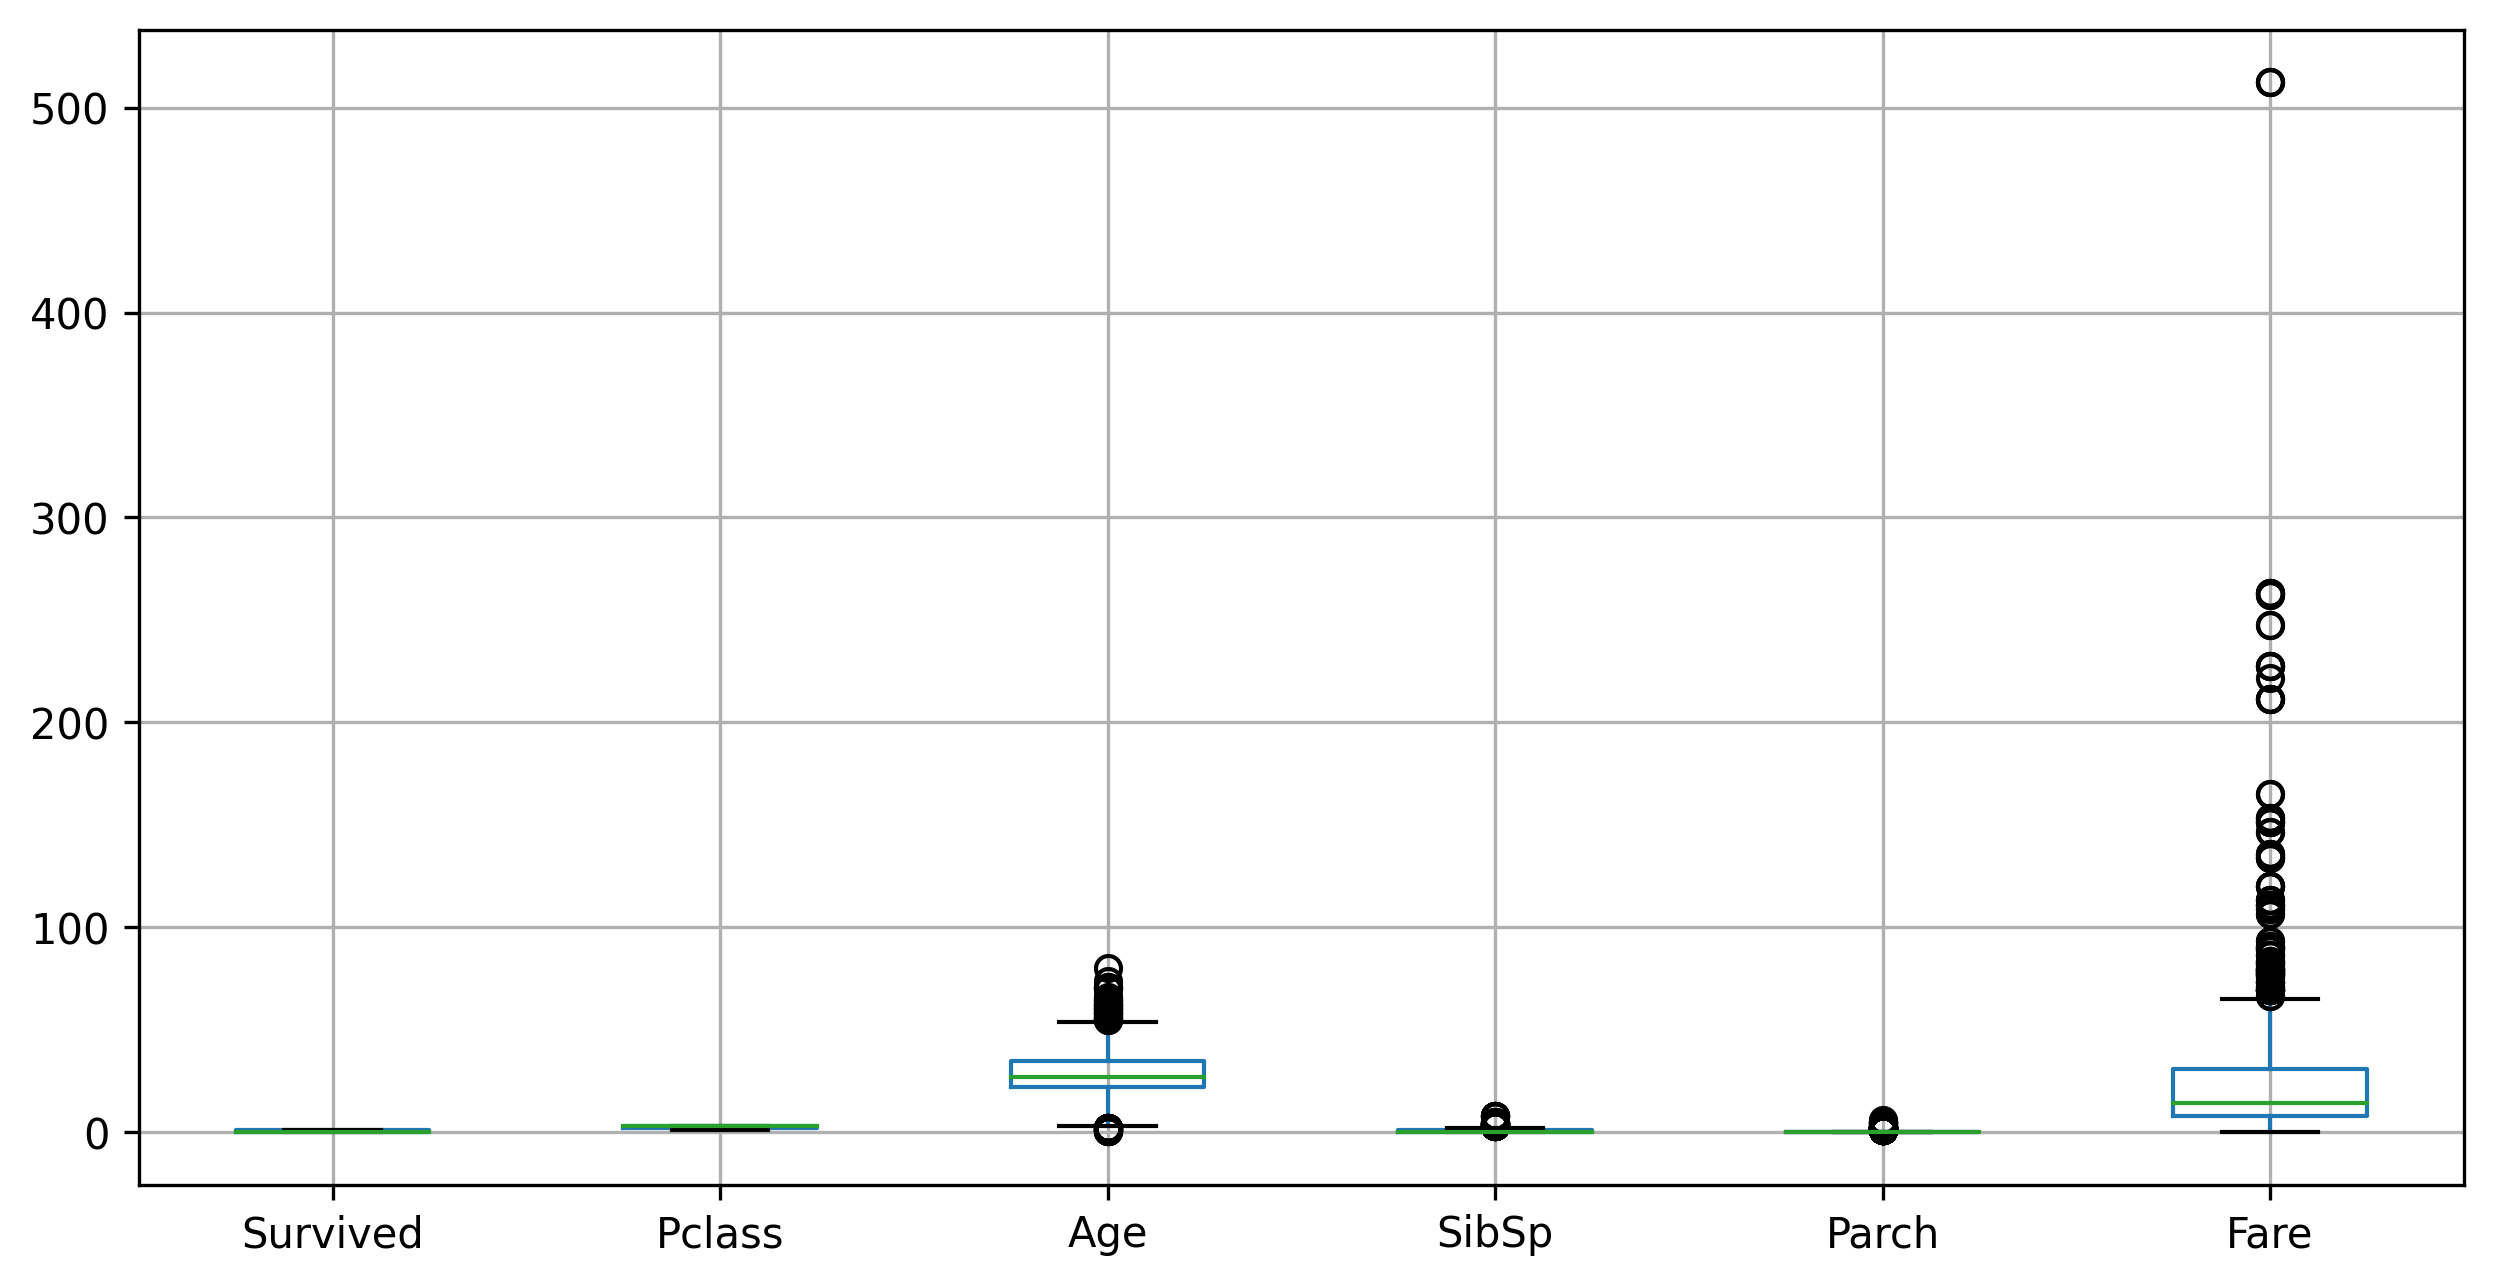

In [28]:
titanic_train_data.boxplot()

<Axes: >

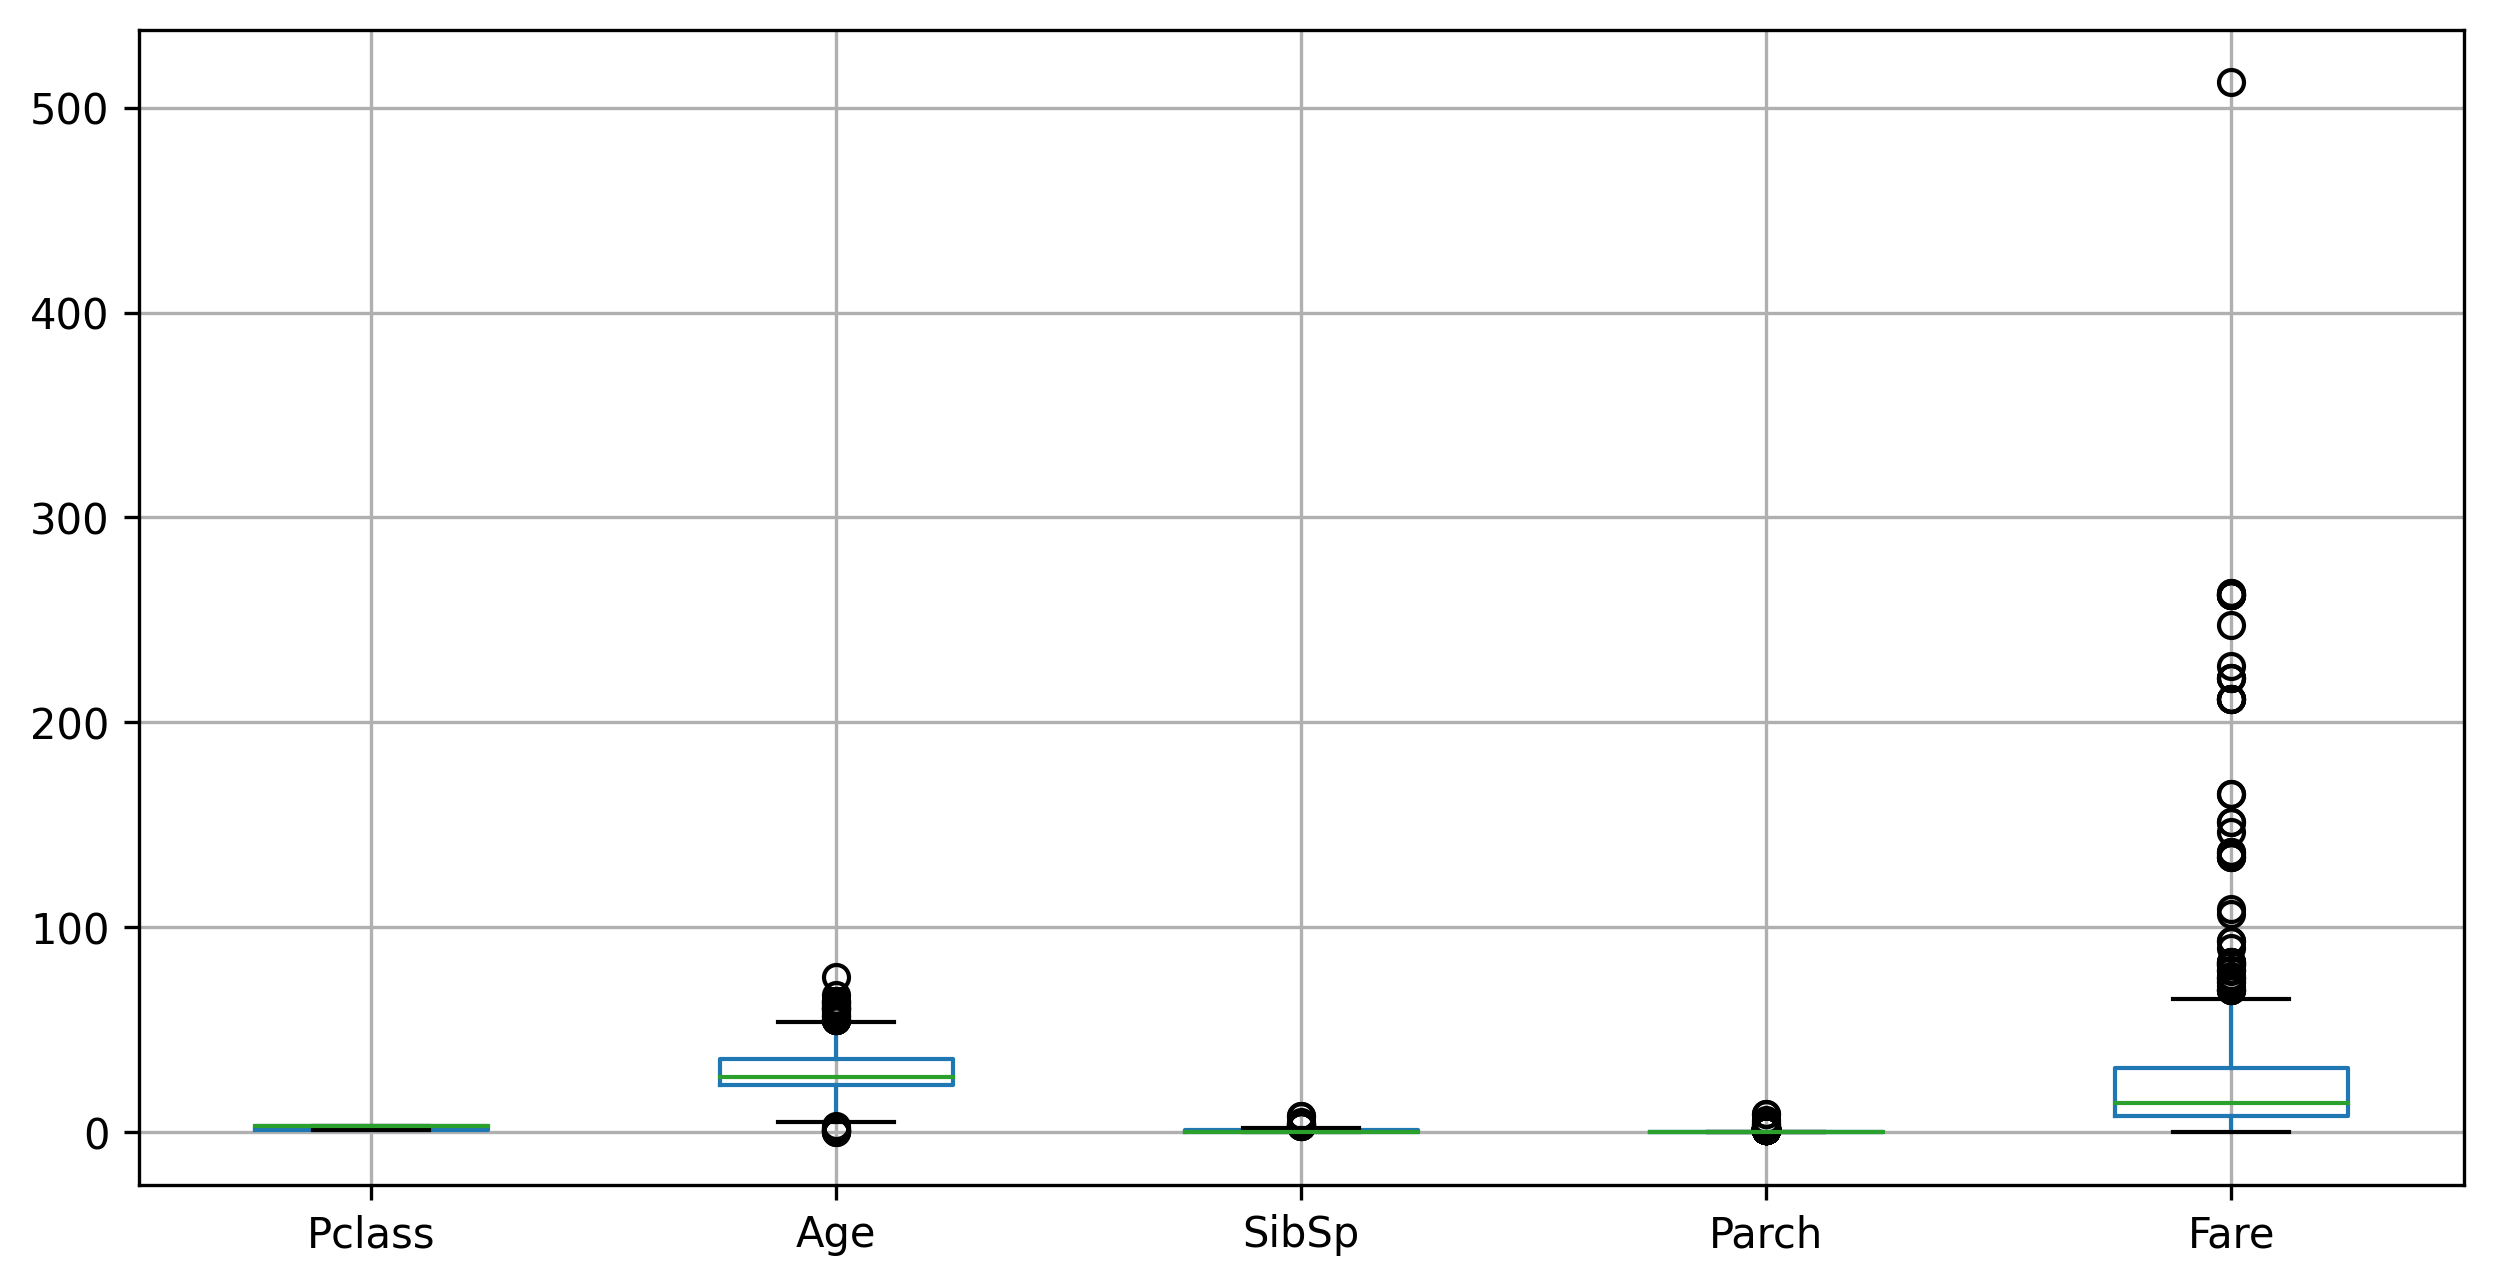

In [29]:
titanic_test_data.boxplot()

In [30]:
def outlier_detection(data, columns):

    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1

        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)

        titanic_train_data[col] = np.where(titanic_train_data[col] > upper, upper, np.where(titanic_train_data[col] < lower, lower,titanic_train_data[col]))

In [31]:
def outlier_detection(data, columns):

    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1

        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)

        titanic_test_data[col] = np.where(titanic_test_data[col] > upper, upper, np.where(titanic_test_data[col] < lower, lower,titanic_test_data[col]))

In [32]:
titanic_train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [33]:
titanic_test_data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [34]:
titanic_train_data.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


In [35]:
titanic_test_data.dtypes

,0
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


In [36]:
#temparary we drop these columns for outlier detection
titanic_train_data.drop(columns=['Sex','Embarked']).columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [37]:
#temparary we drop these columns for outlier detection
titanic_test_data.drop(columns=['Sex','Embarked']).columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

<Axes: >

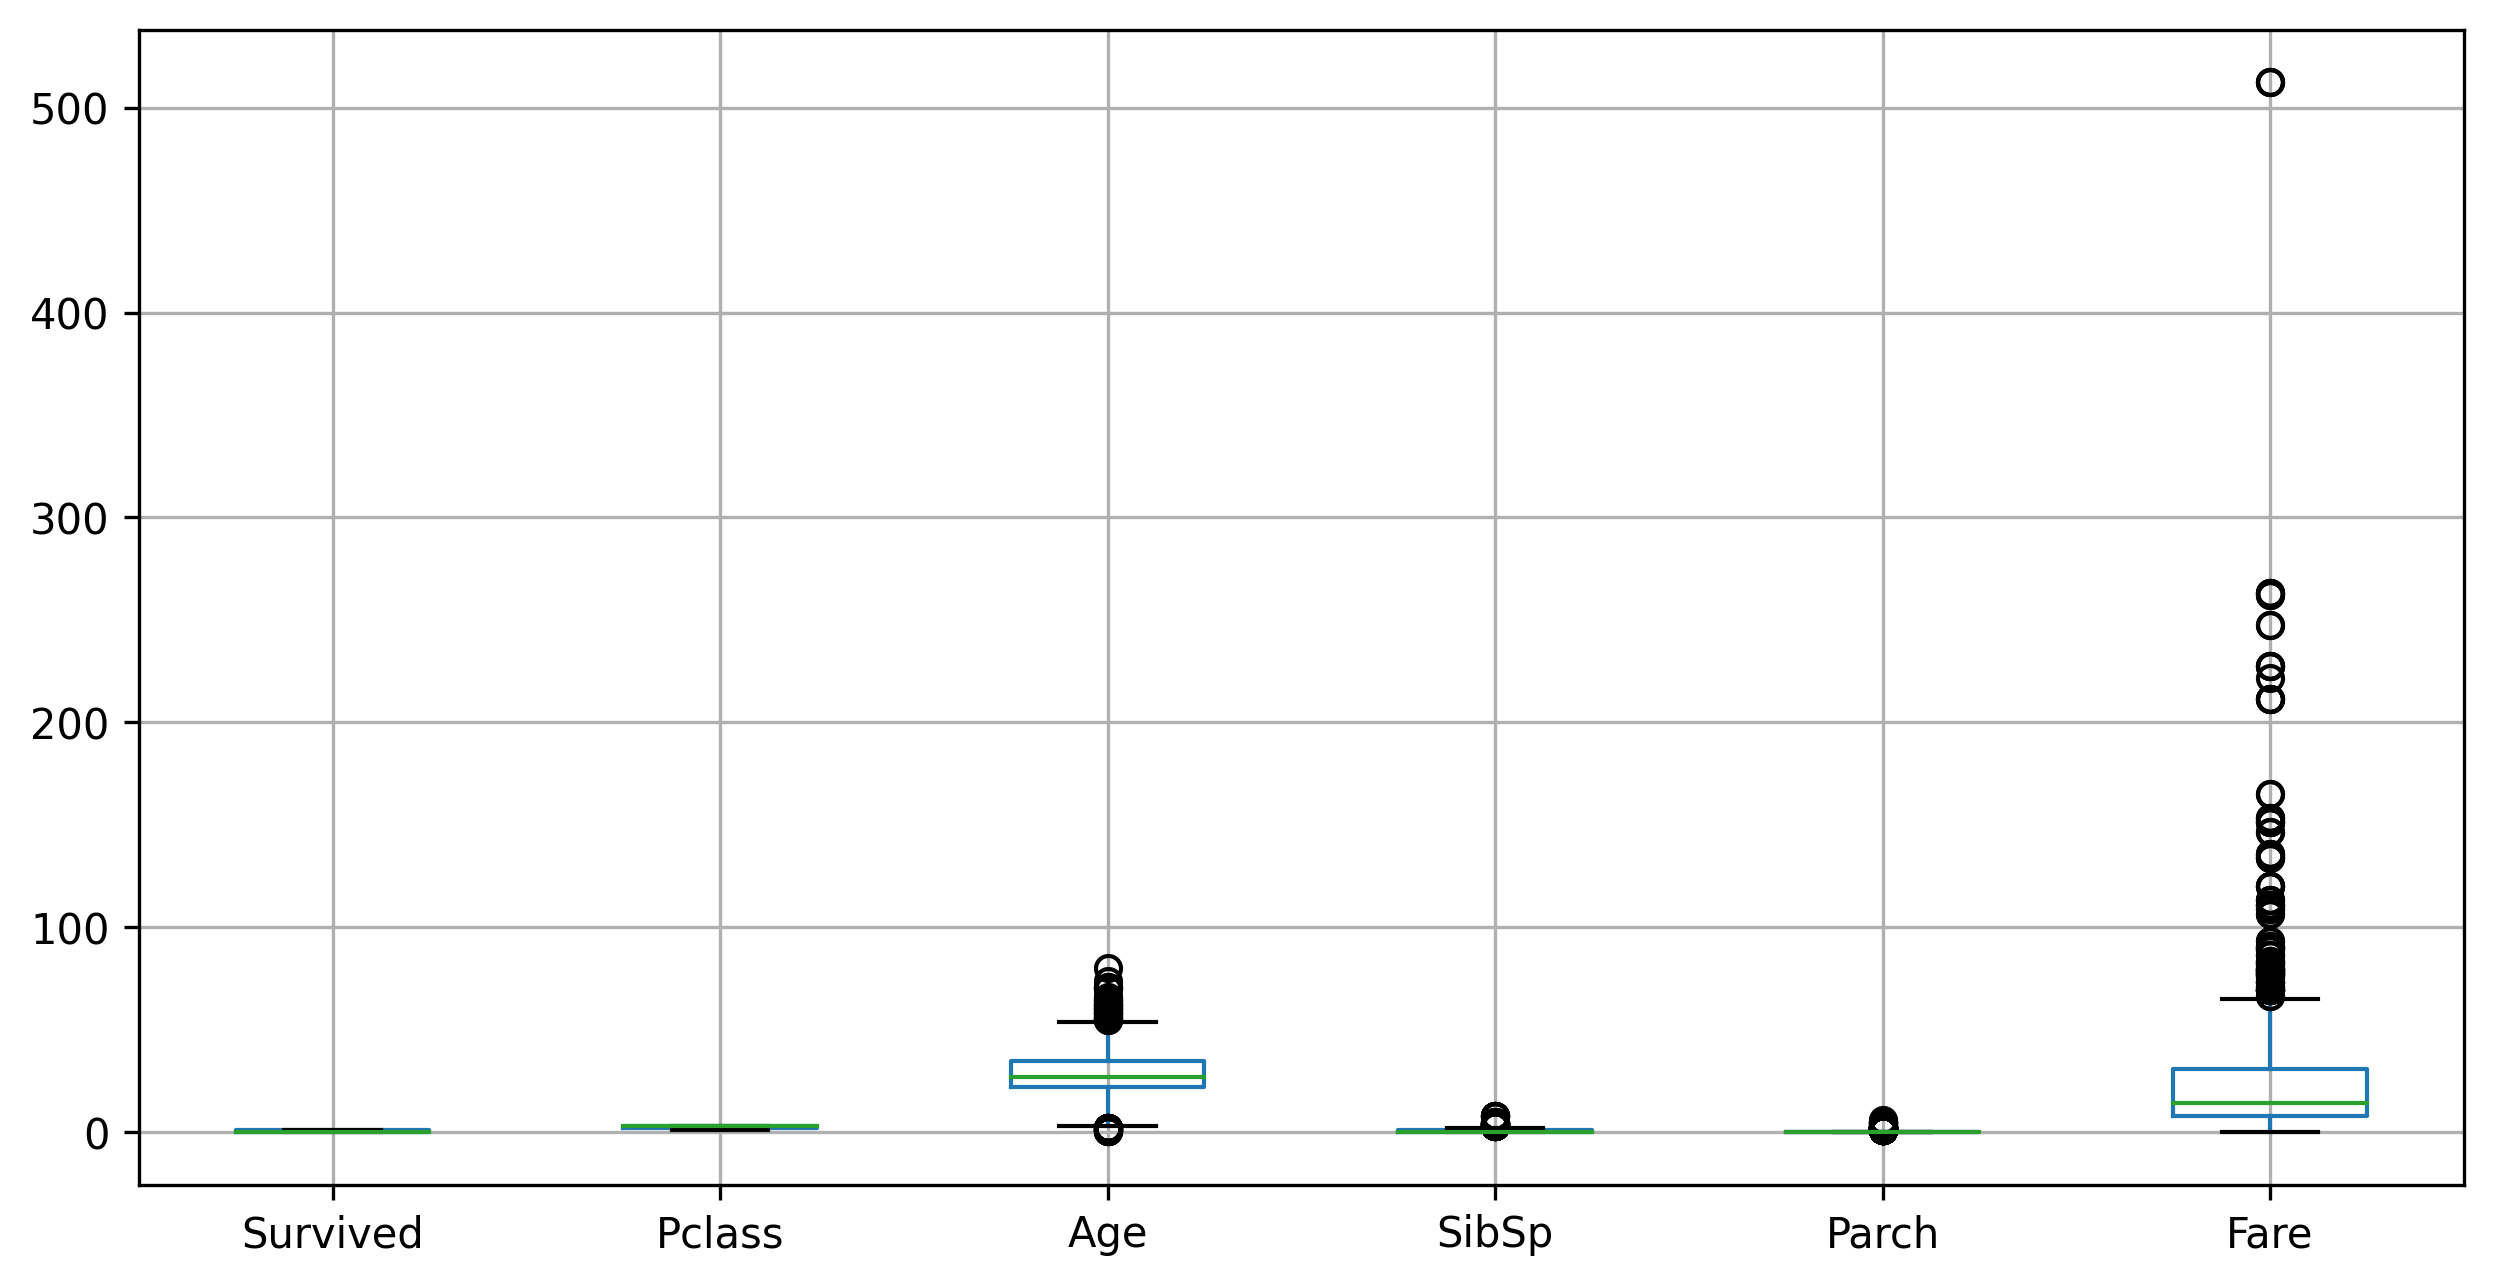

In [38]:
titanic_train_data.boxplot()

<Axes: >

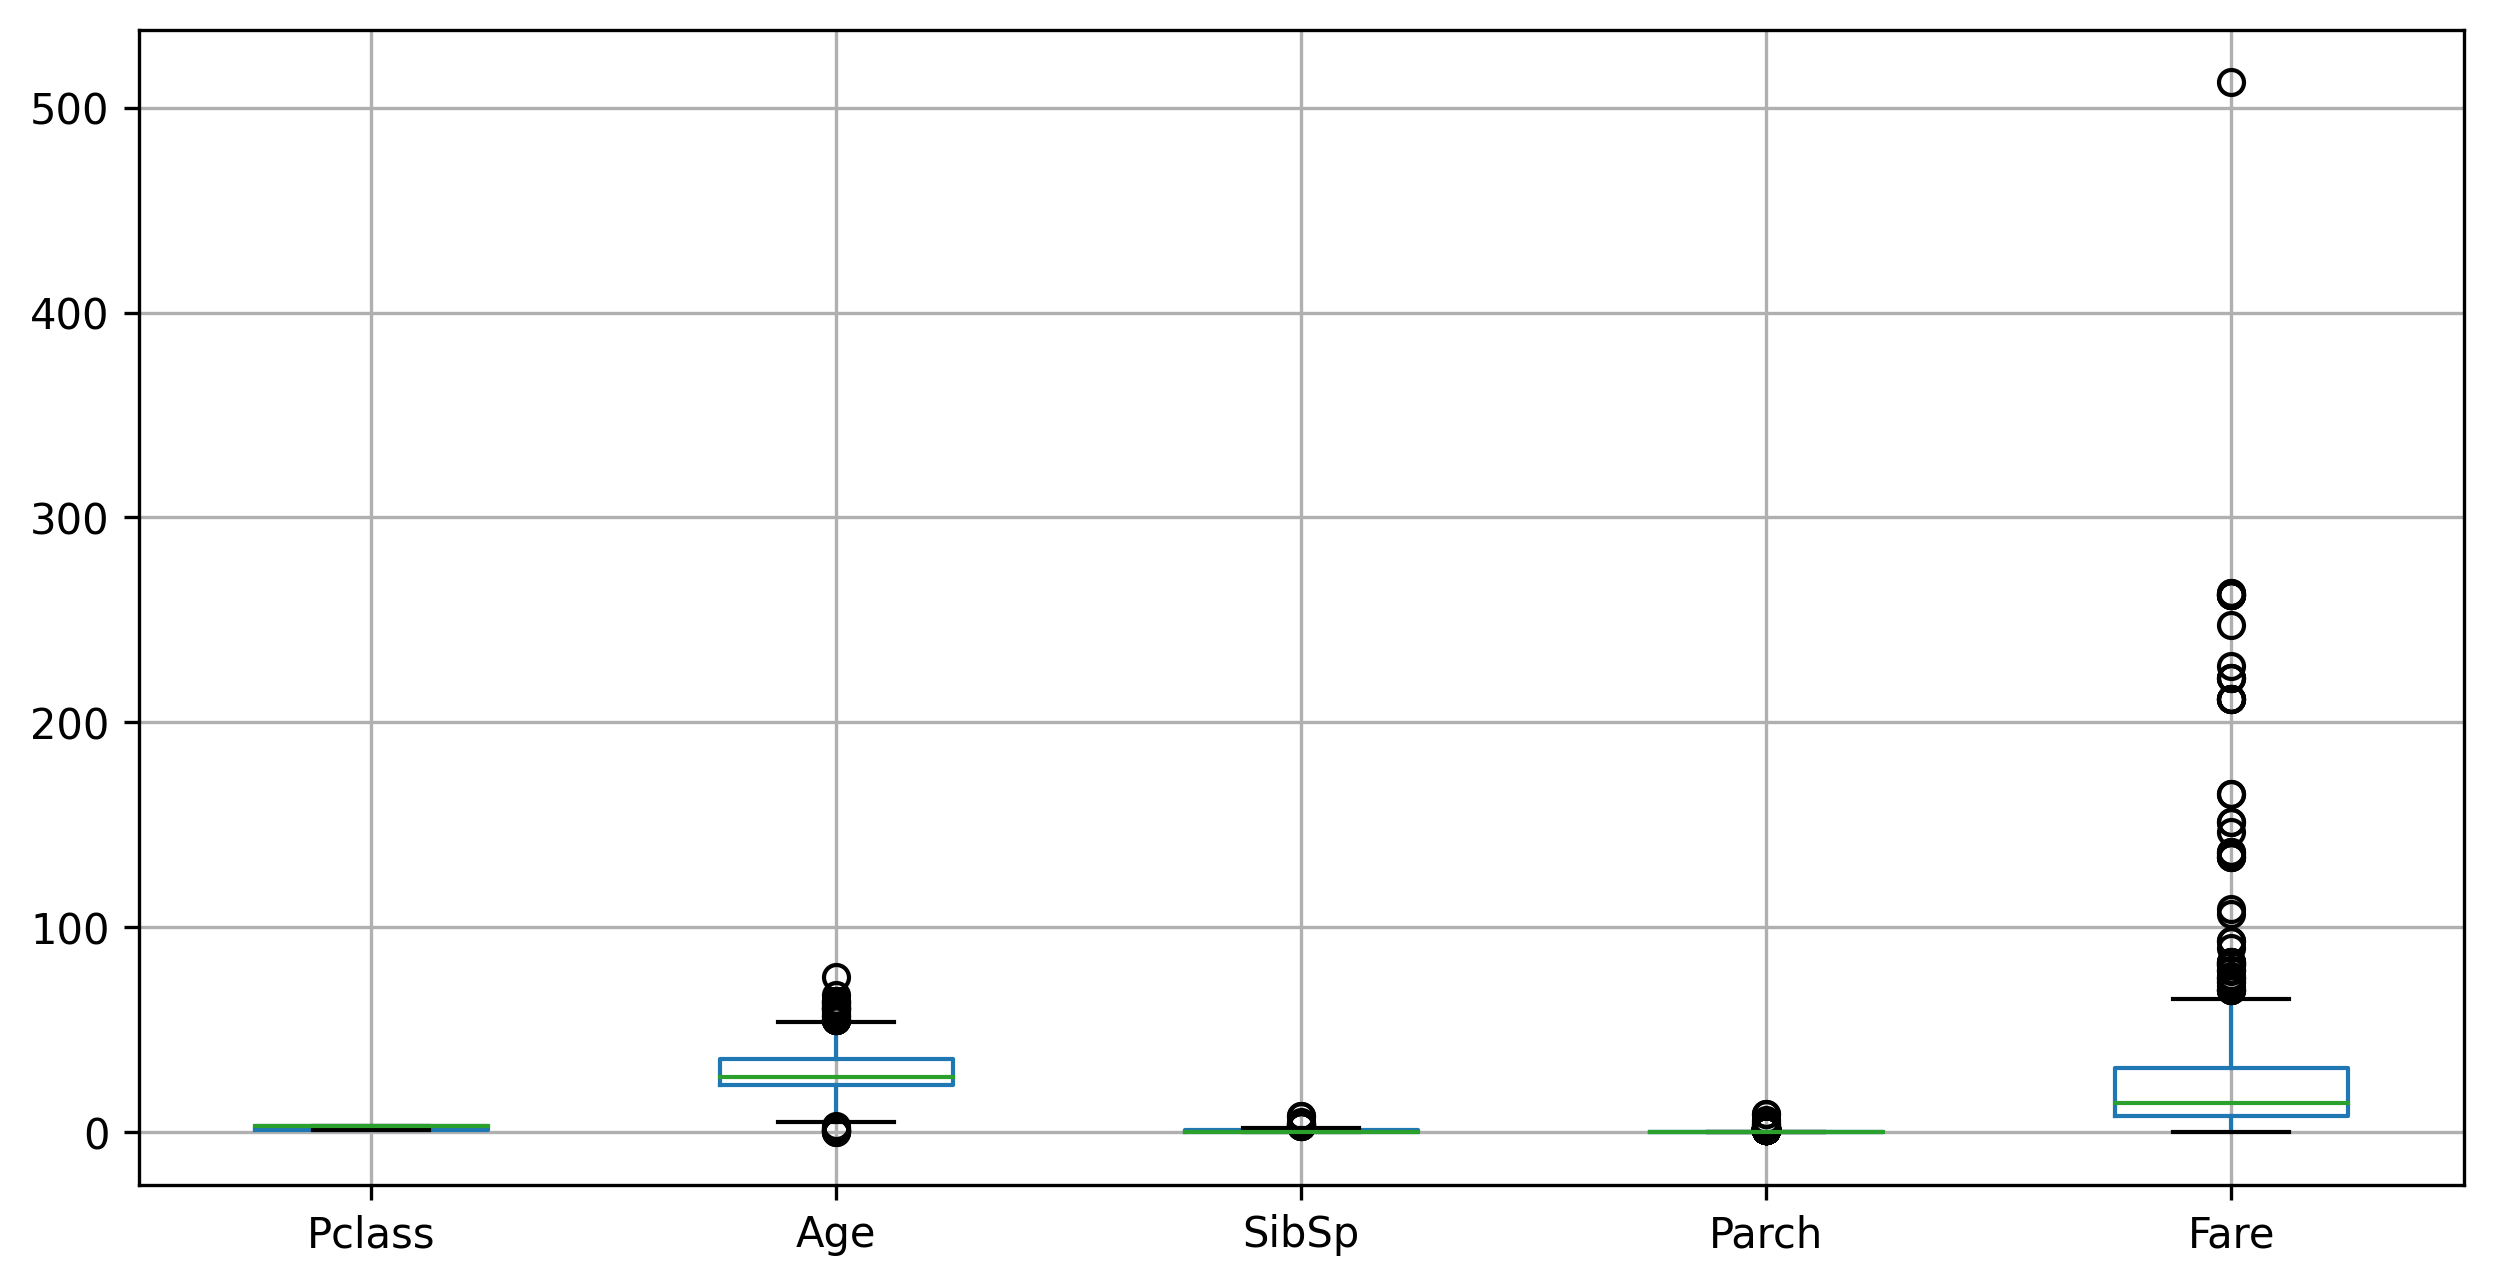

In [39]:
titanic_test_data.boxplot()

In [40]:
#scatter and correlation
titanic_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [41]:
titanic_test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


<Axes: xlabel='Pclass', ylabel='Fare'>

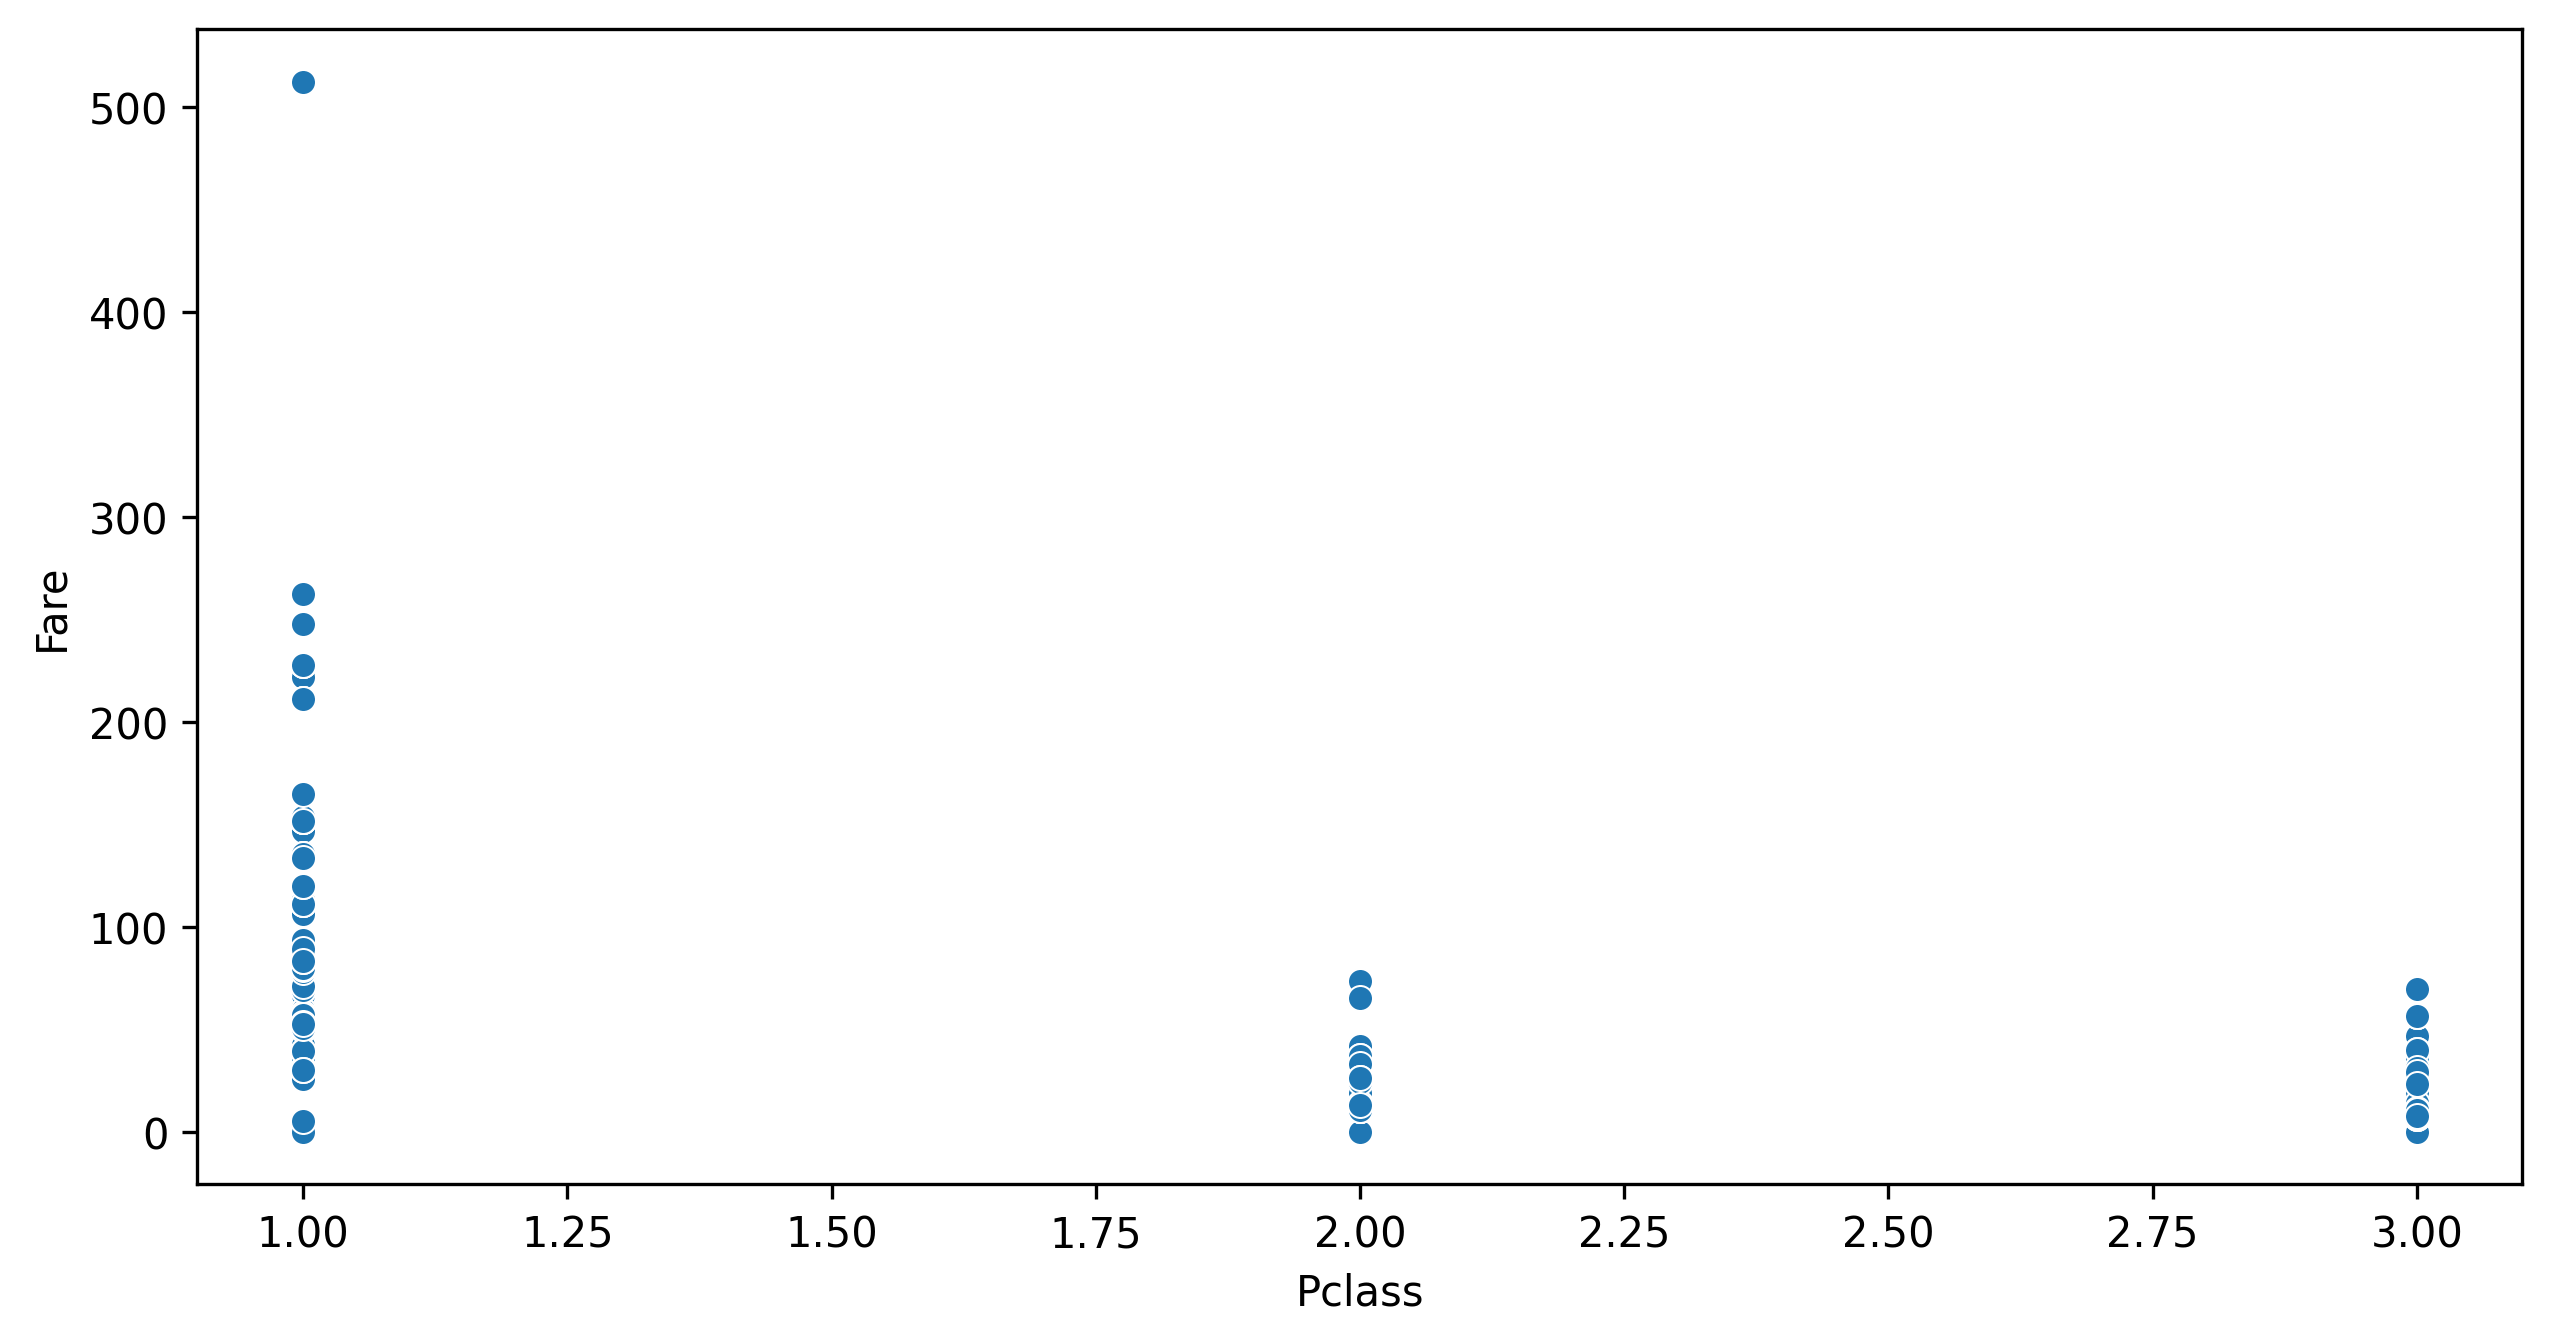

In [42]:
sns.scatterplot(x = titanic_train_data['Pclass'], y =titanic_train_data['Fare'])

<Axes: xlabel='Pclass', ylabel='Fare'>

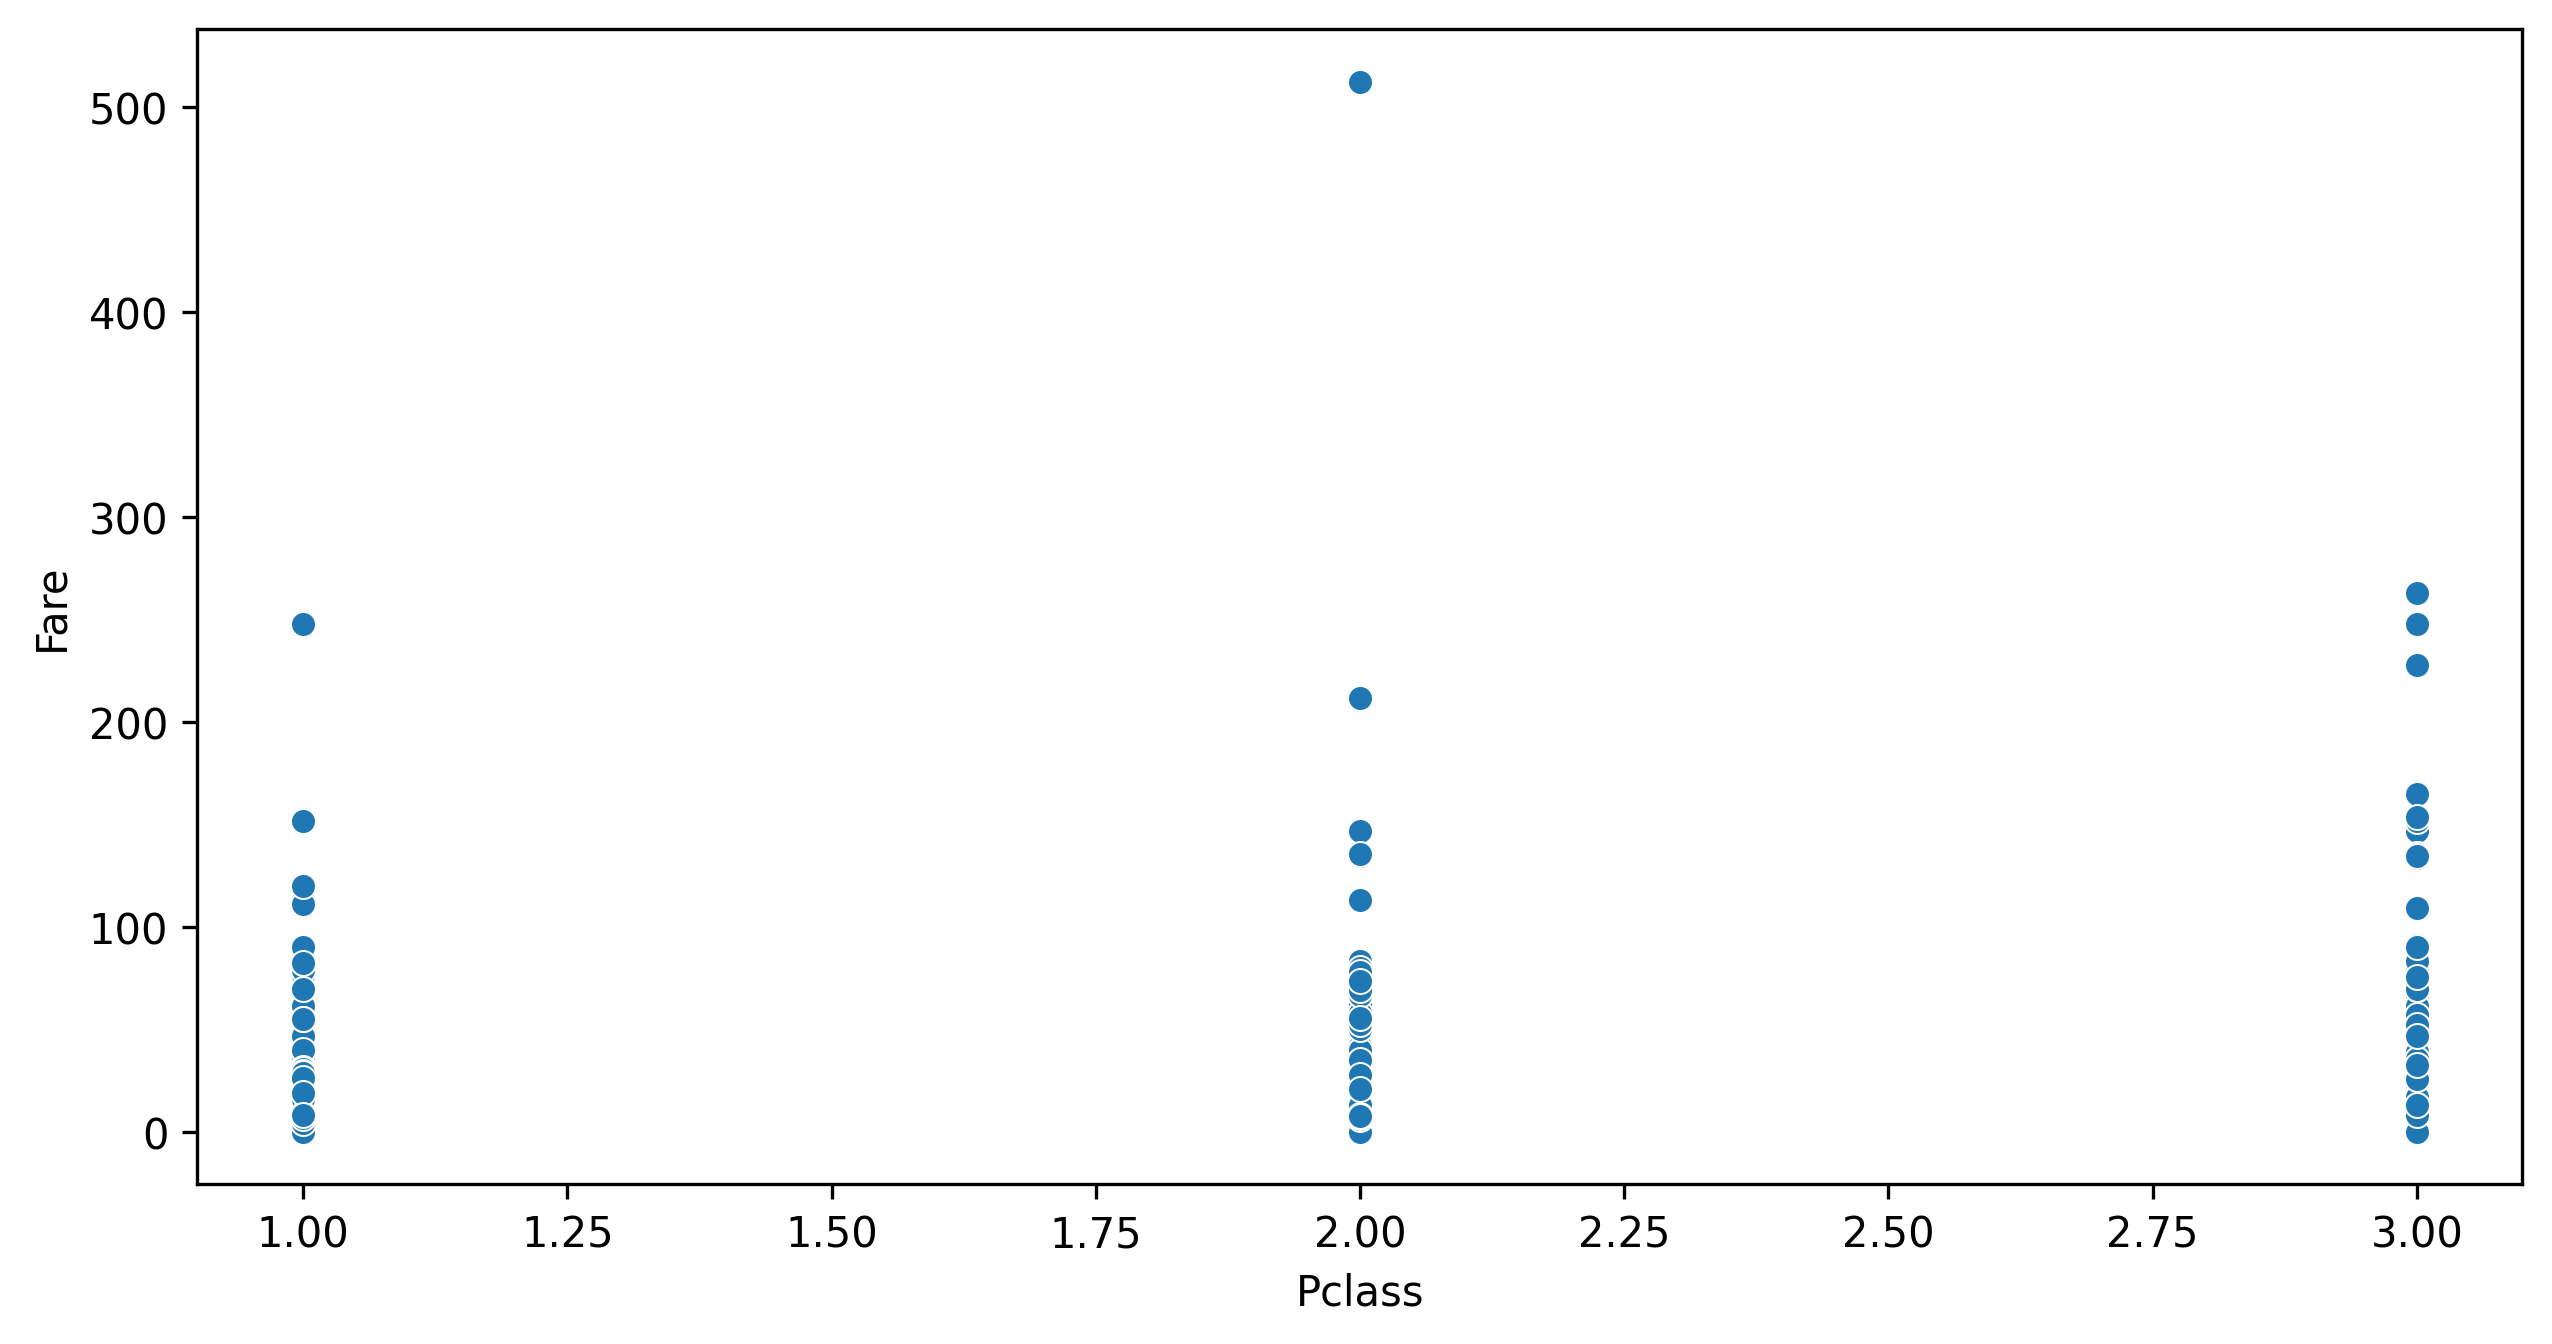

In [43]:
sns.scatterplot(x = titanic_test_data['Pclass'], y =titanic_train_data['Fare'])

<Axes: xlabel='Pclass', ylabel='Age'>

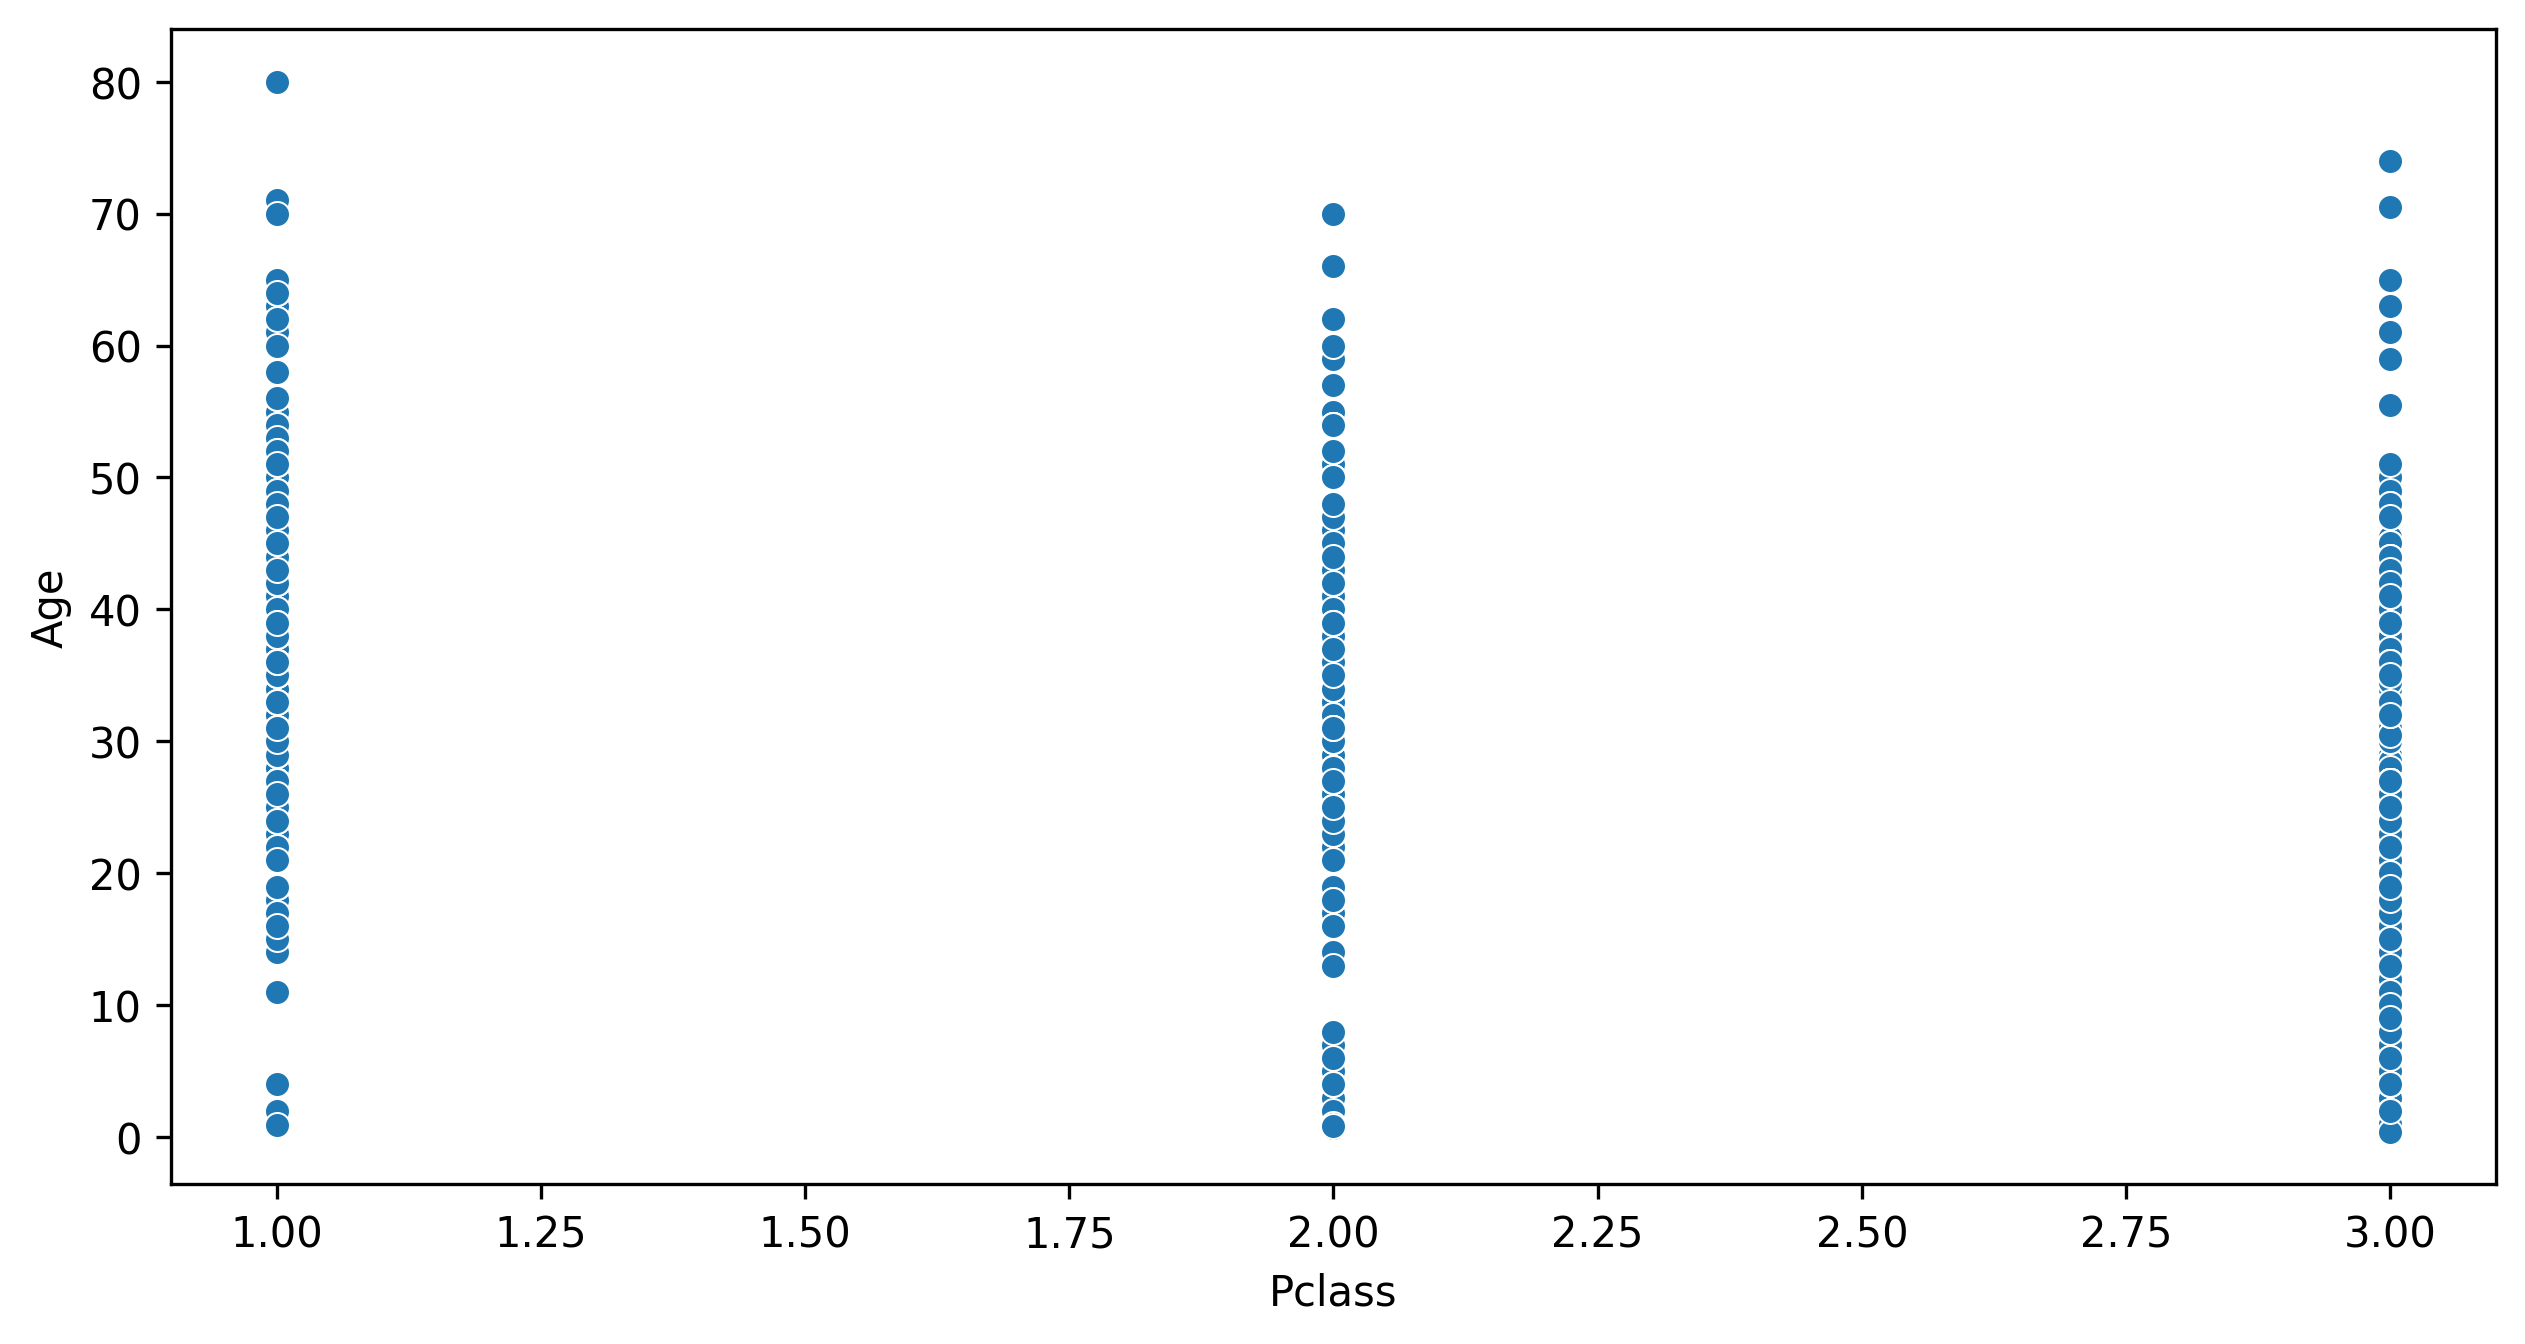

In [44]:
sns.scatterplot(x = titanic_train_data['Pclass'], y =titanic_train_data['Age'])

<Axes: xlabel='Pclass', ylabel='Age'>

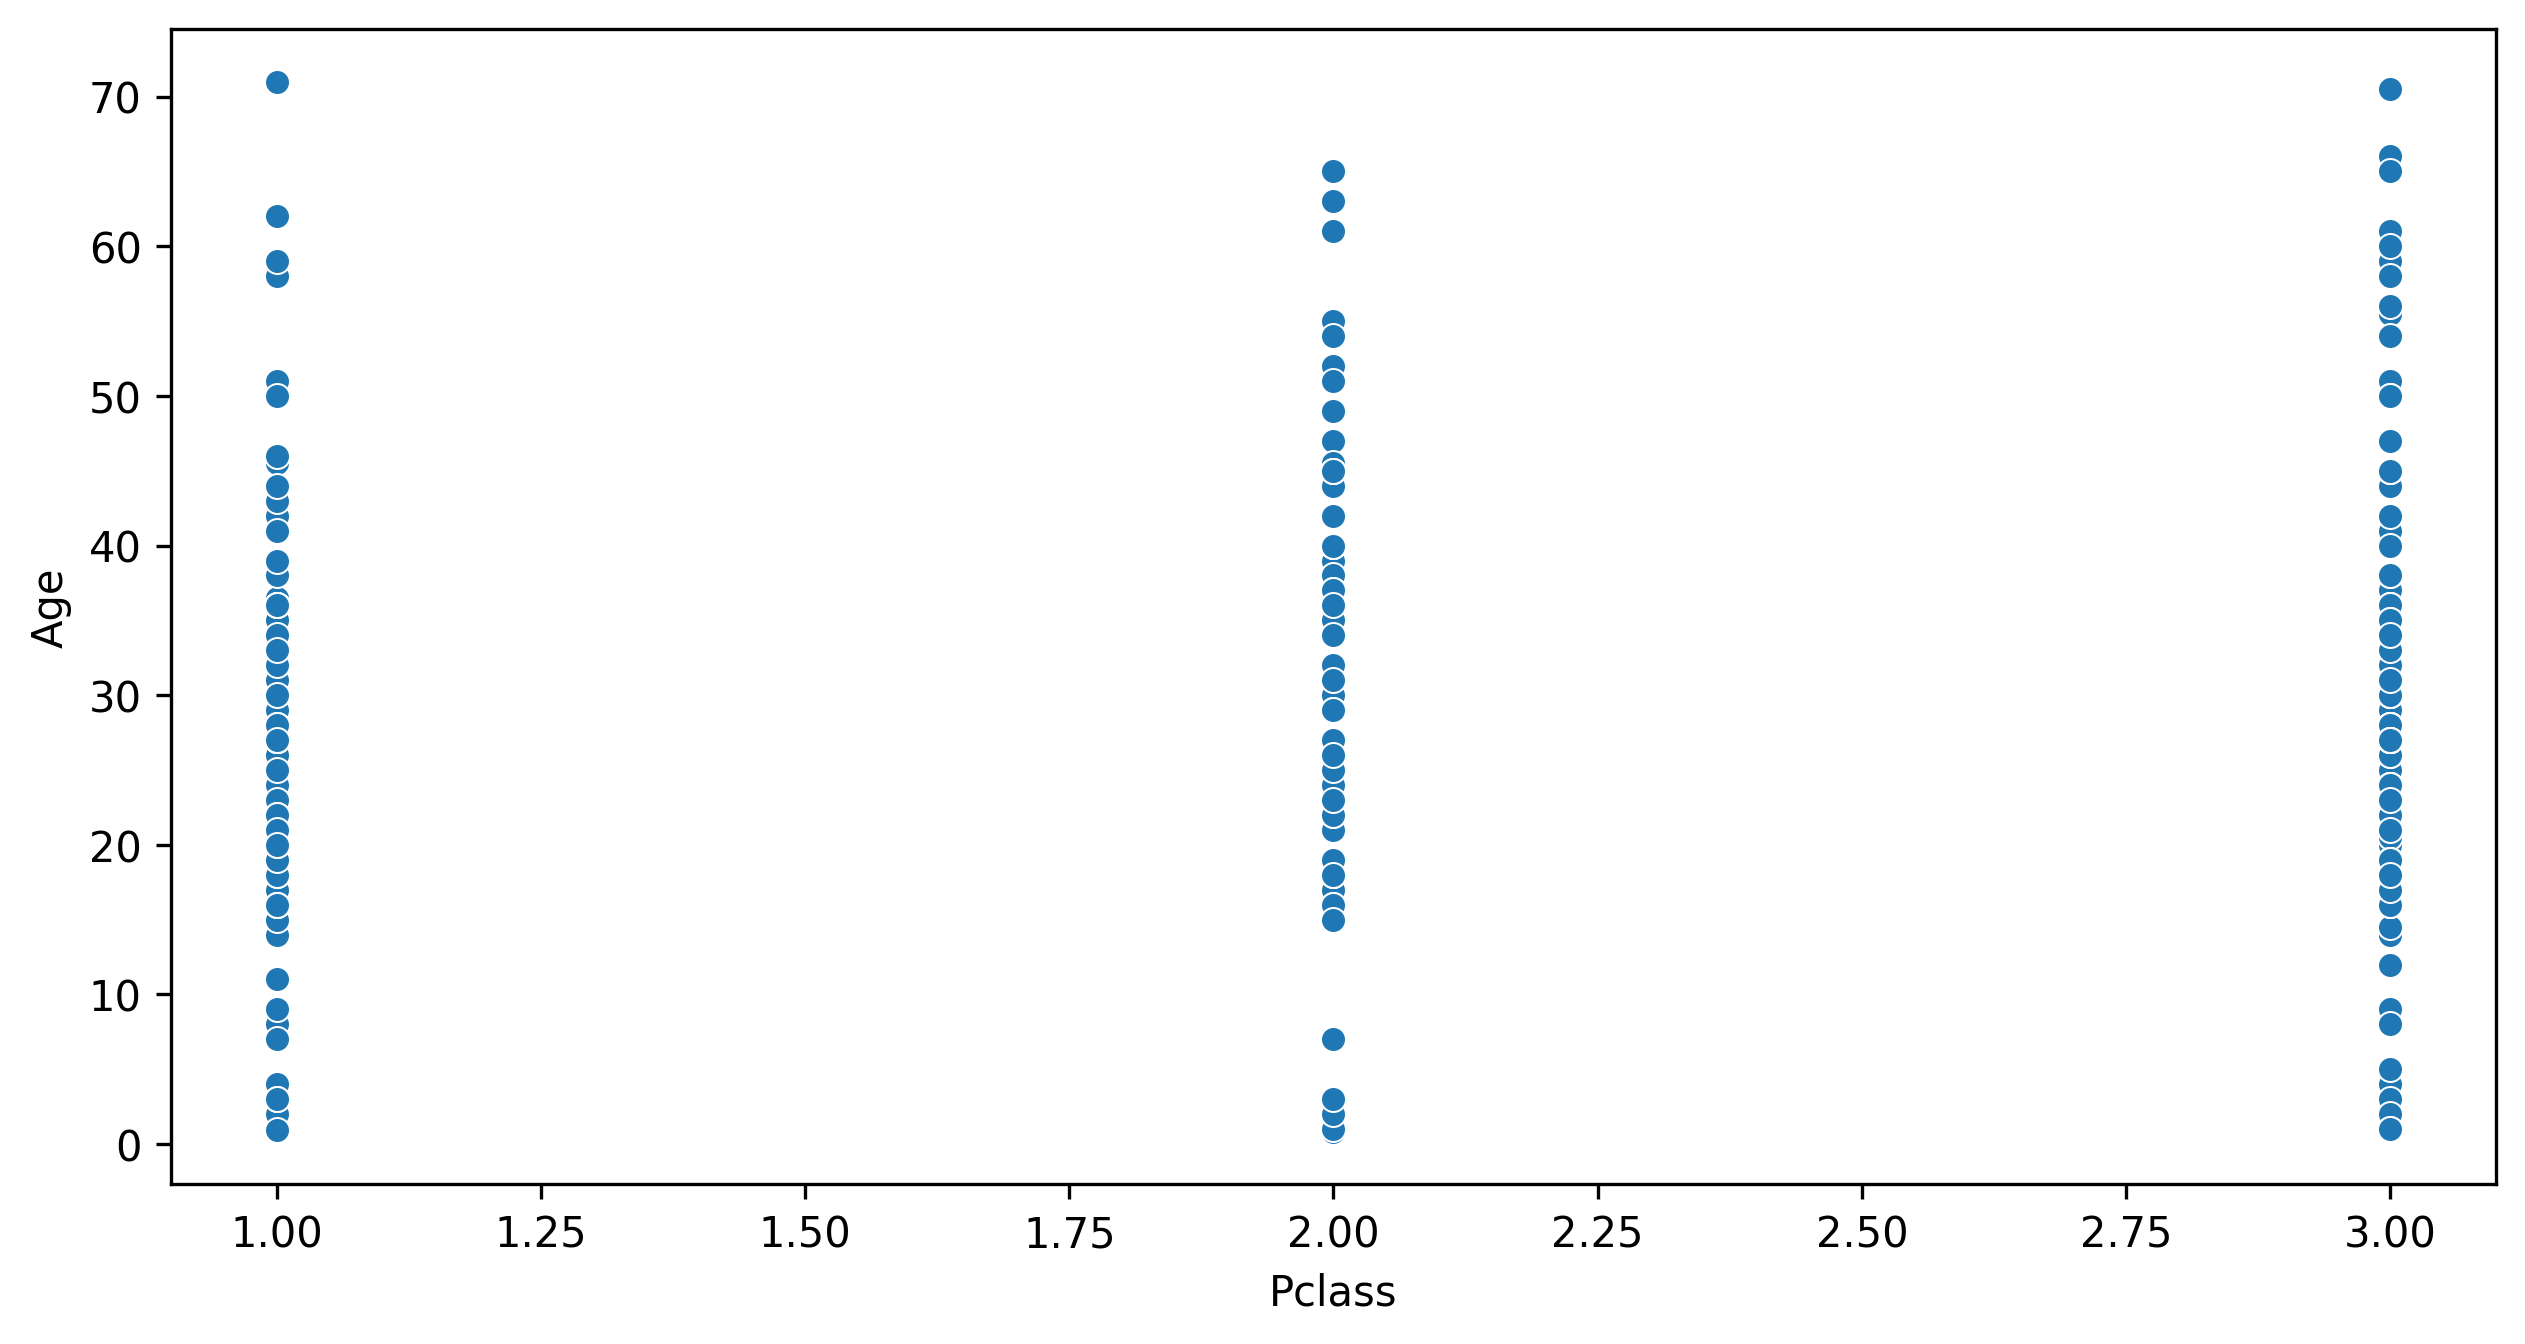

In [45]:
sns.scatterplot(x = titanic_test_data['Pclass'], y =titanic_train_data['Age'])

In [46]:
titanic_train_data.drop(columns=['Parch'], inplace=True)

In [47]:
titanic_test_data.drop(columns=['Parch'], inplace=True)

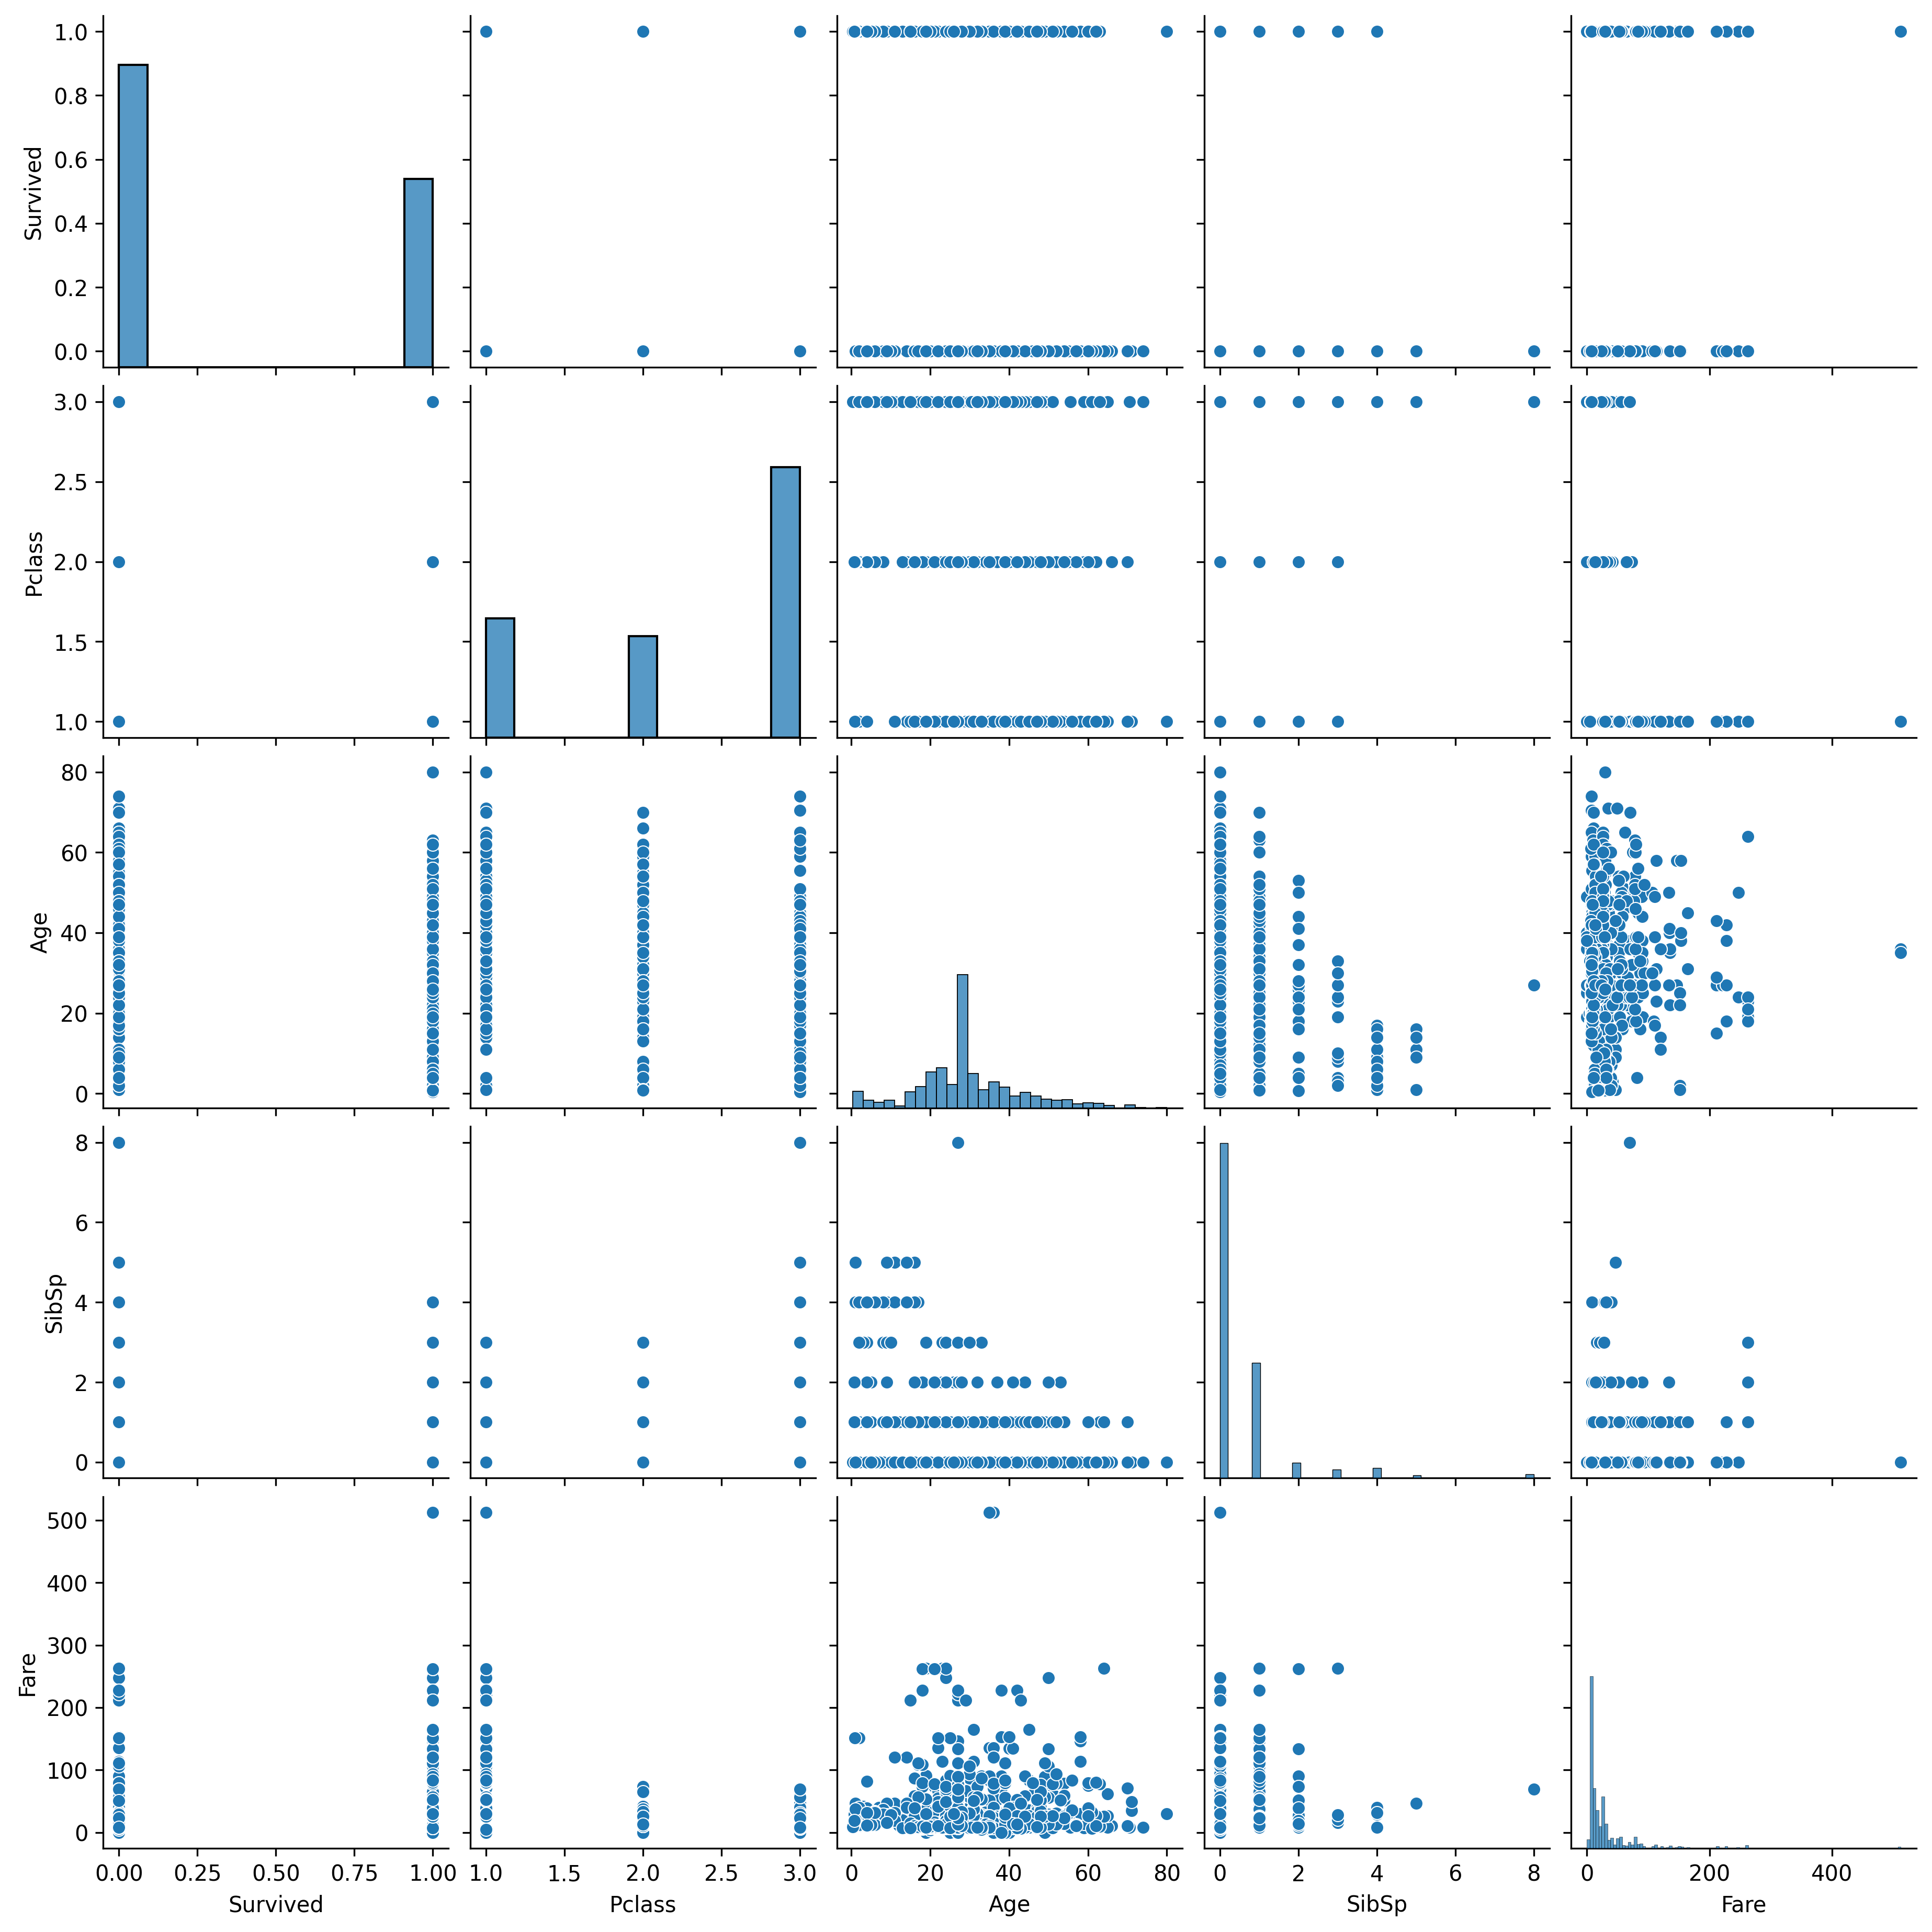

In [48]:
sns.pairplot(titanic_train_data)

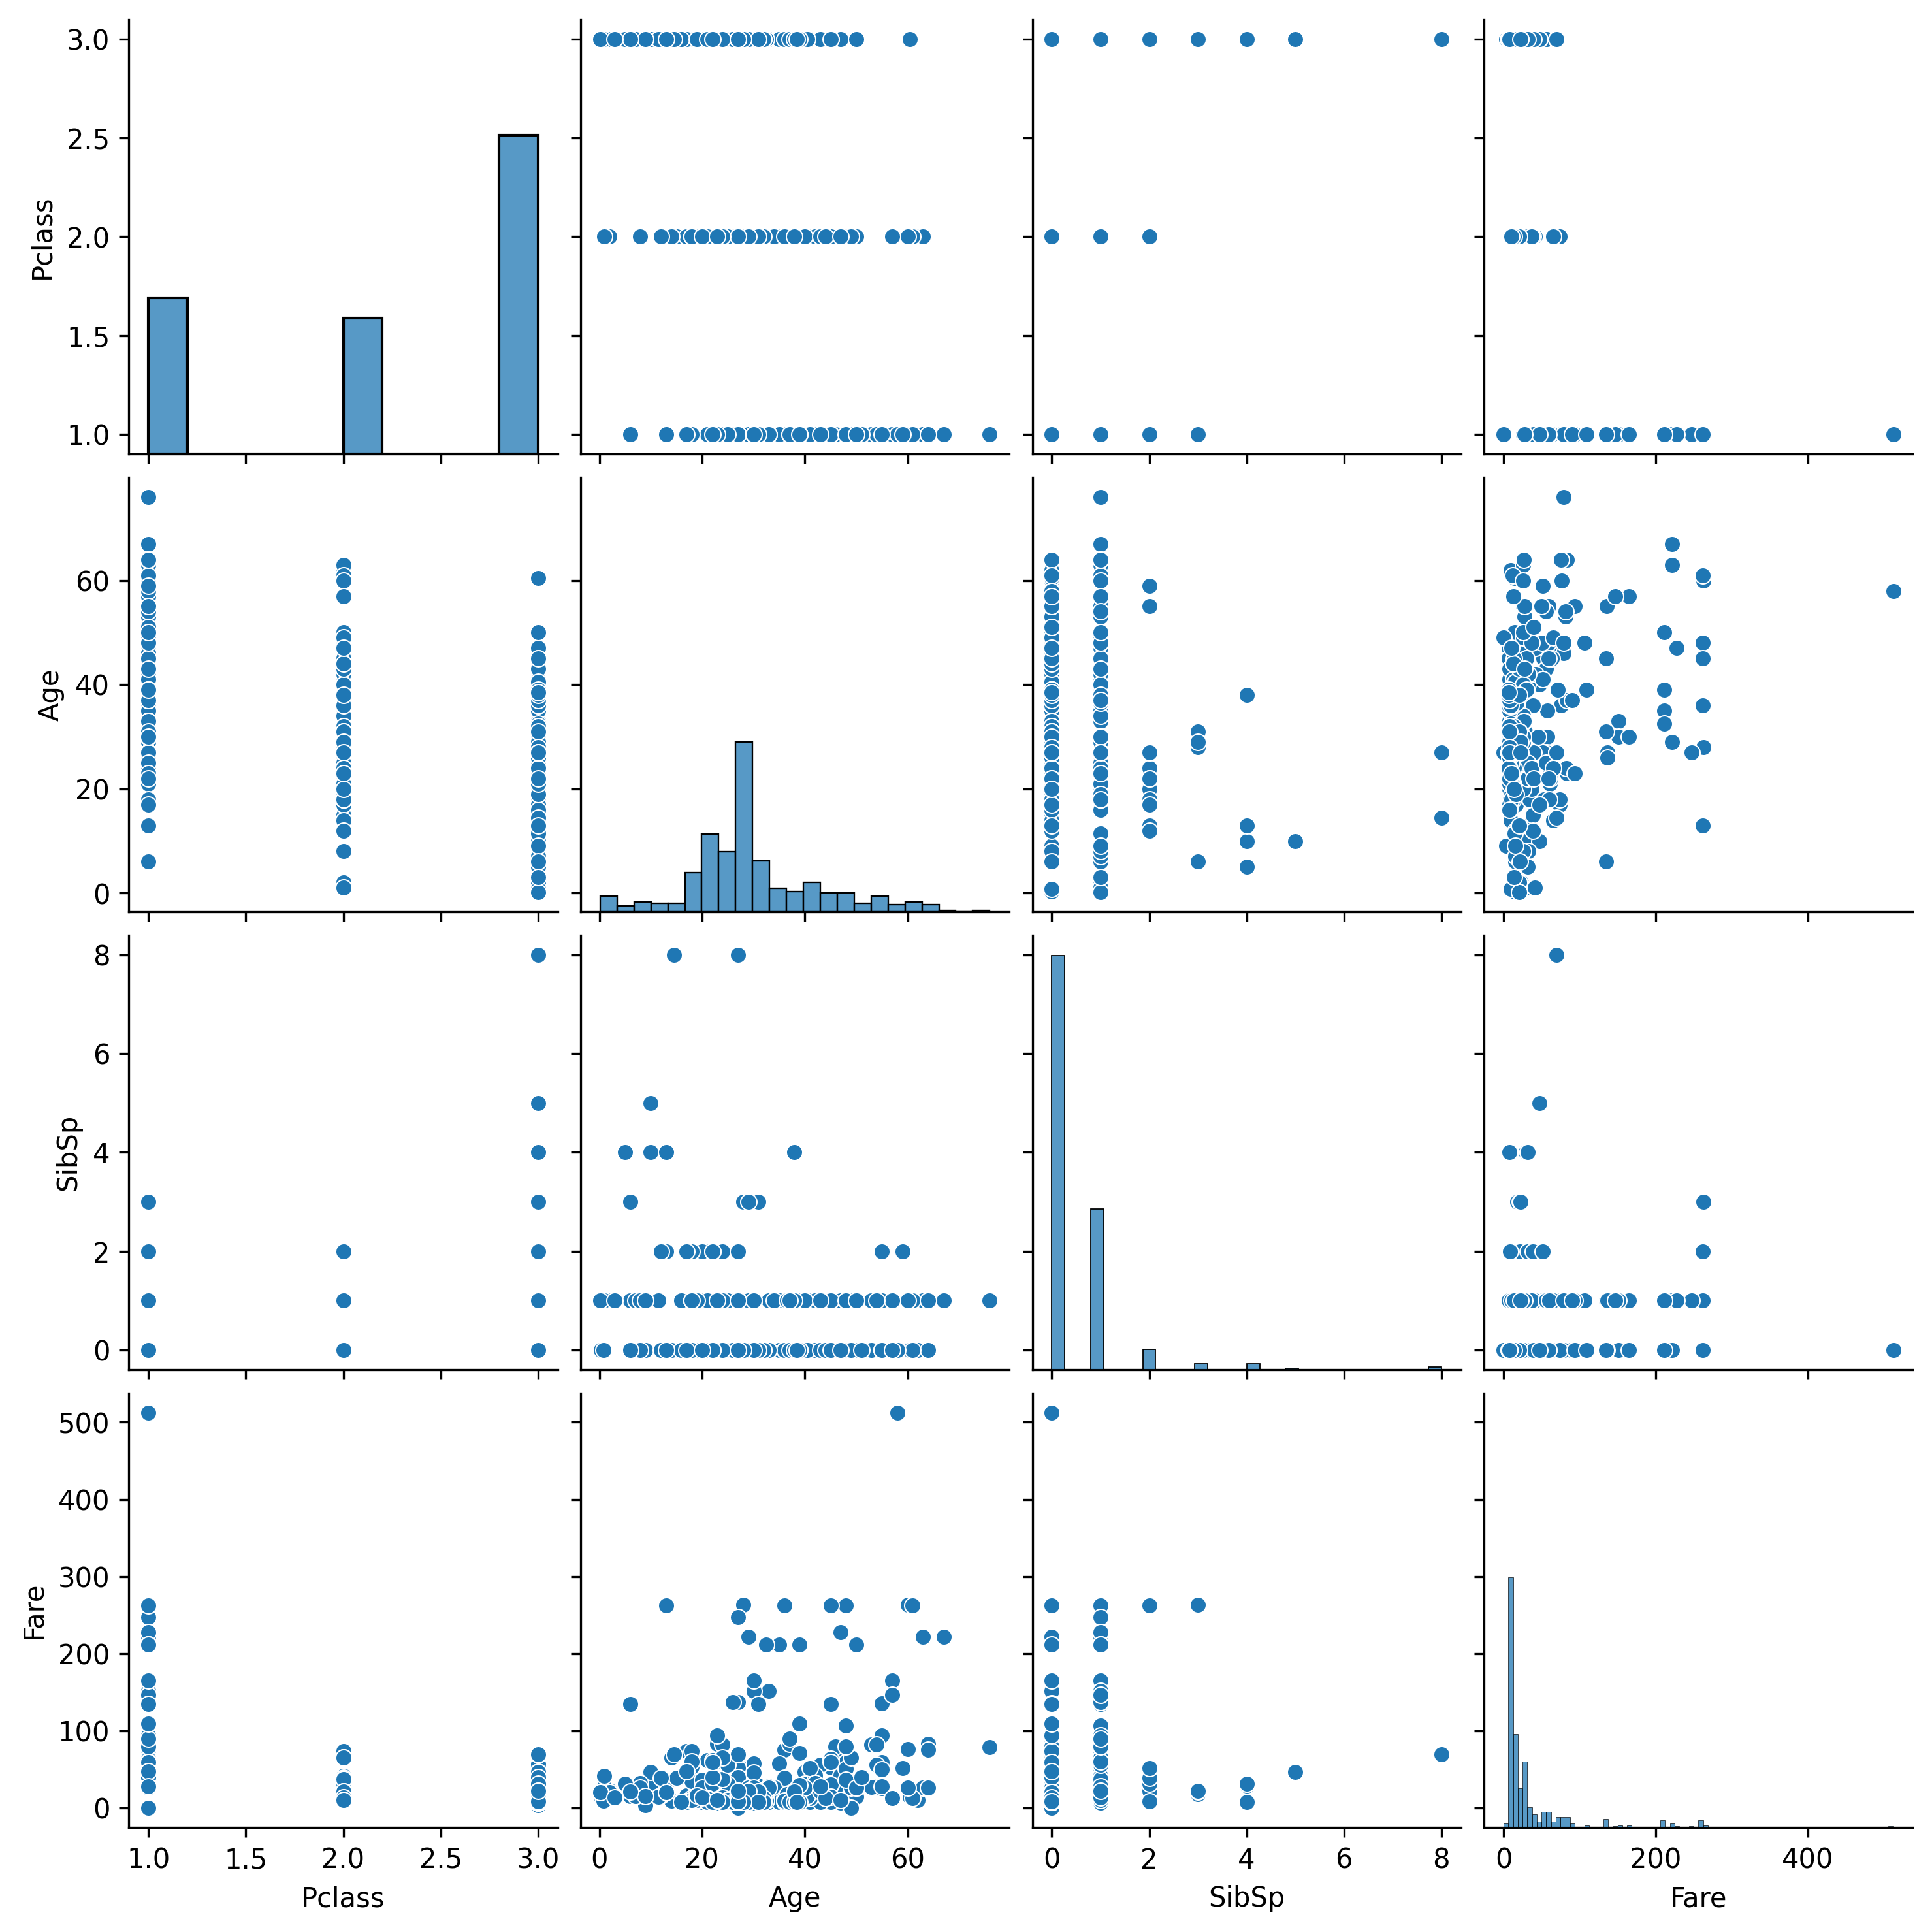

In [49]:
sns.pairplot(titanic_test_data)

In [50]:
#Correlation coefficient
import warnings
warnings.filterwarnings('ignore')
titanic_train_data.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Fare
Survived,1.000000,-0.338481,-0.061956,-0.035322,0.257307
Pclass,-0.338481,1.000000,-0.344489,0.083081,-0.549500
Age,-0.061956,-0.344489,1.000000,-0.233396,0.099571
SibSp,-0.035322,0.083081,-0.233396,1.000000,0.159651
Fare,0.257307,-0.549500,0.099571,0.159651,1.000000


In [51]:
import warnings
warnings.filterwarnings('ignore')
titanic_test_data.corr(numeric_only=True)

,Pclass,Age,SibSp,Fare
Pclass,1.000000,-0.467853,0.001087,-0.577313
Age,-0.467853,1.000000,-0.071197,0.342357
SibSp,0.001087,-0.071197,1.000000,0.171912
Fare,-0.577313,0.342357,0.171912,1.000000


<Axes: >

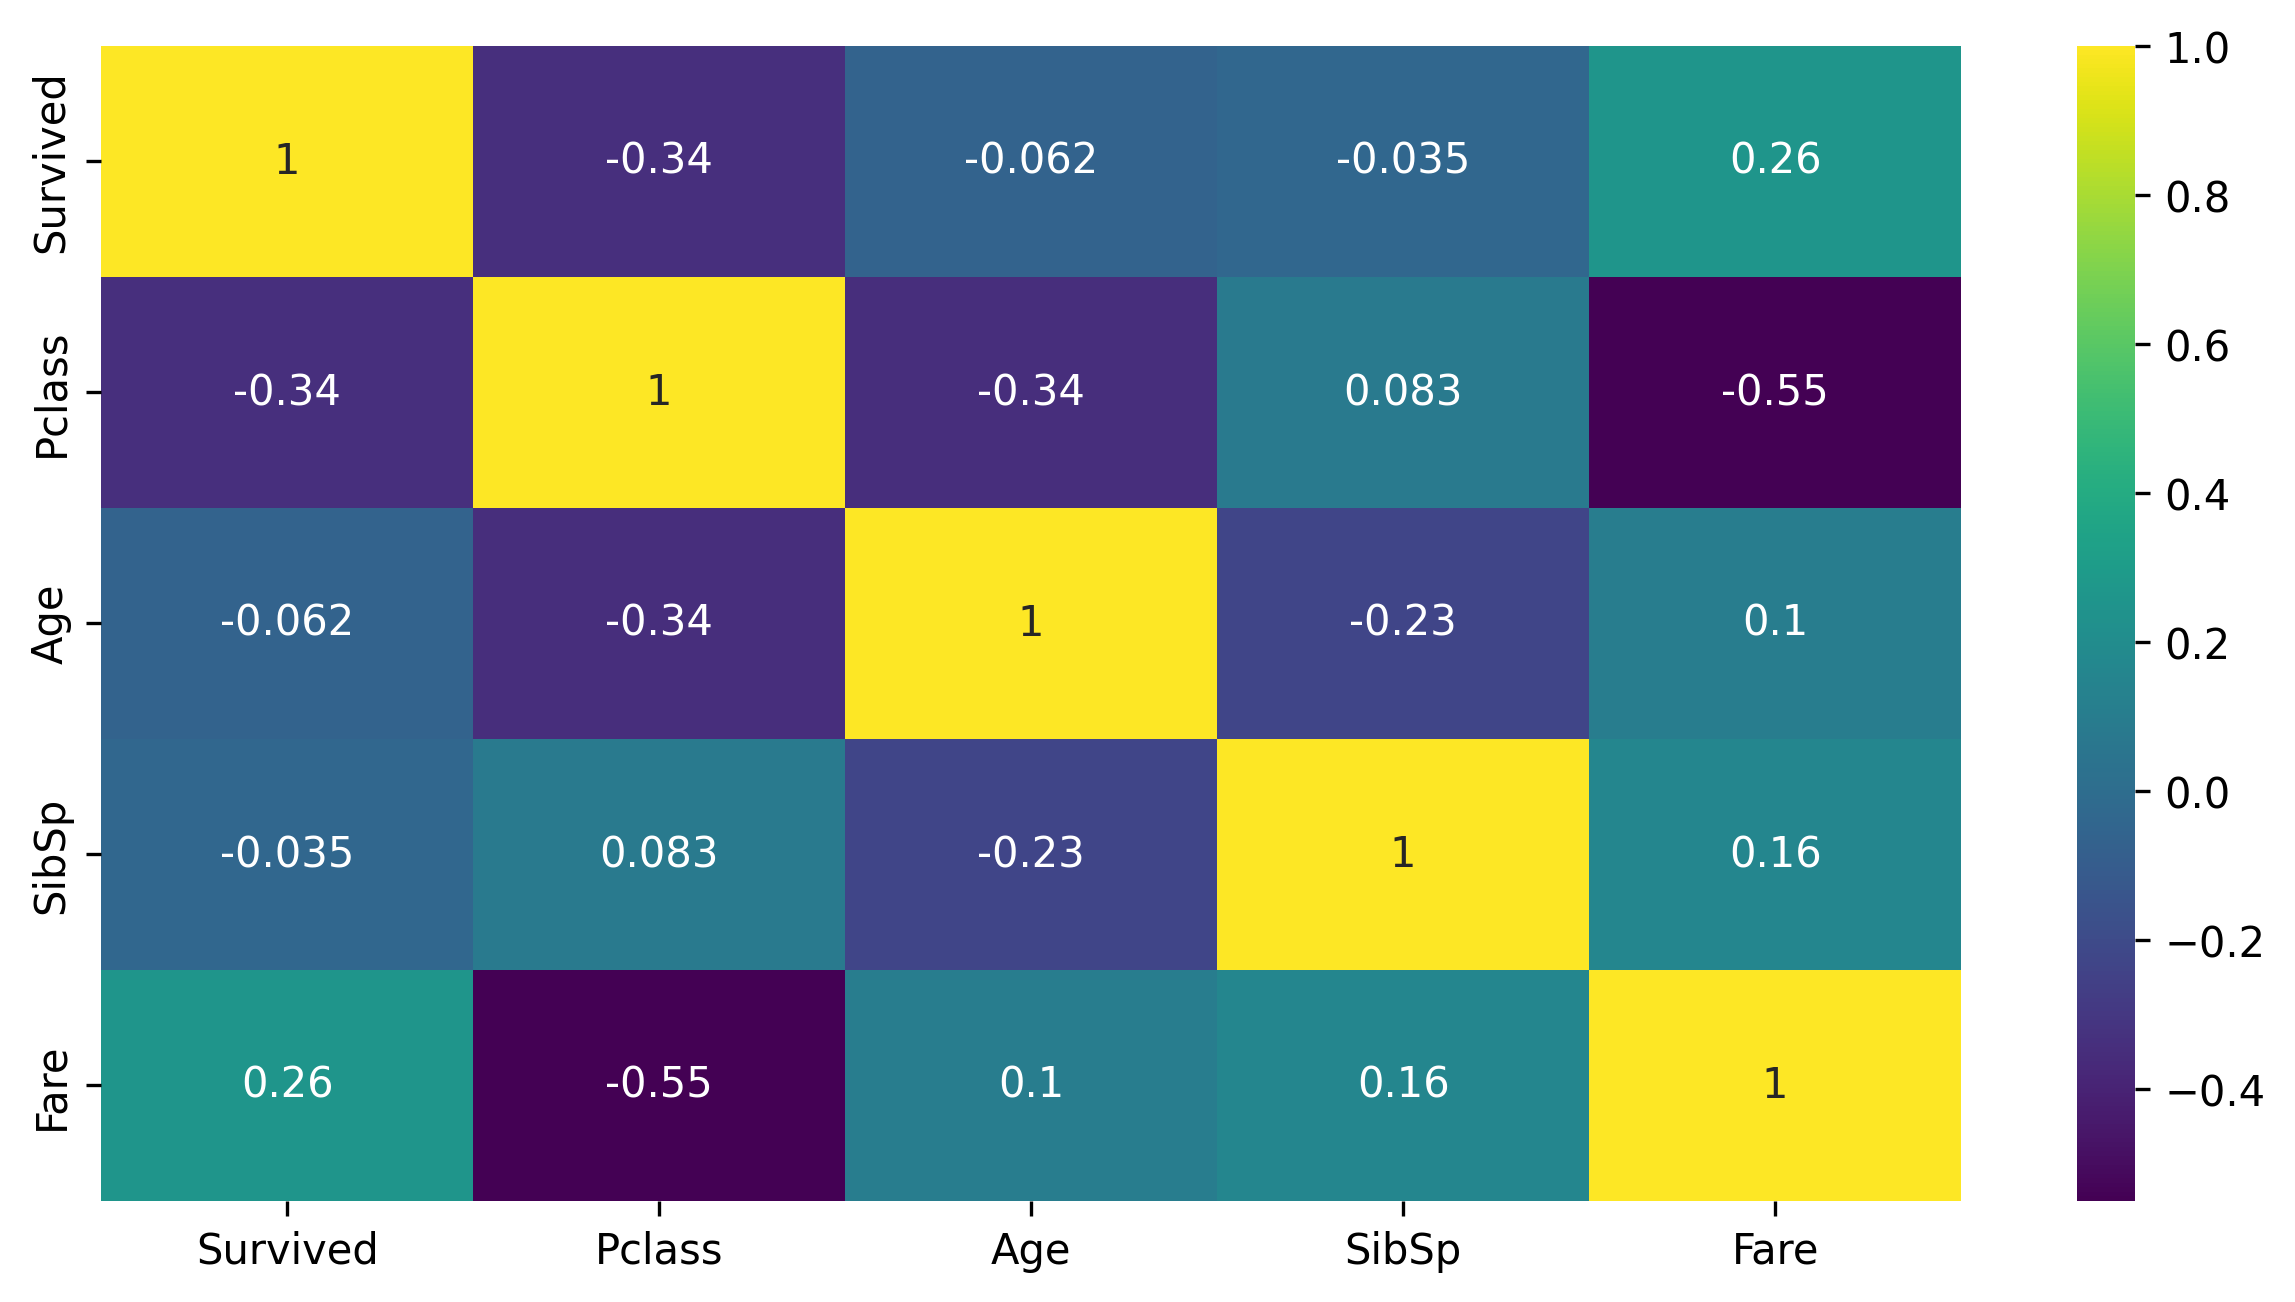

In [52]:
sns.heatmap(titanic_train_data.corr(numeric_only=True), annot=True, cmap='viridis')

<Axes: >

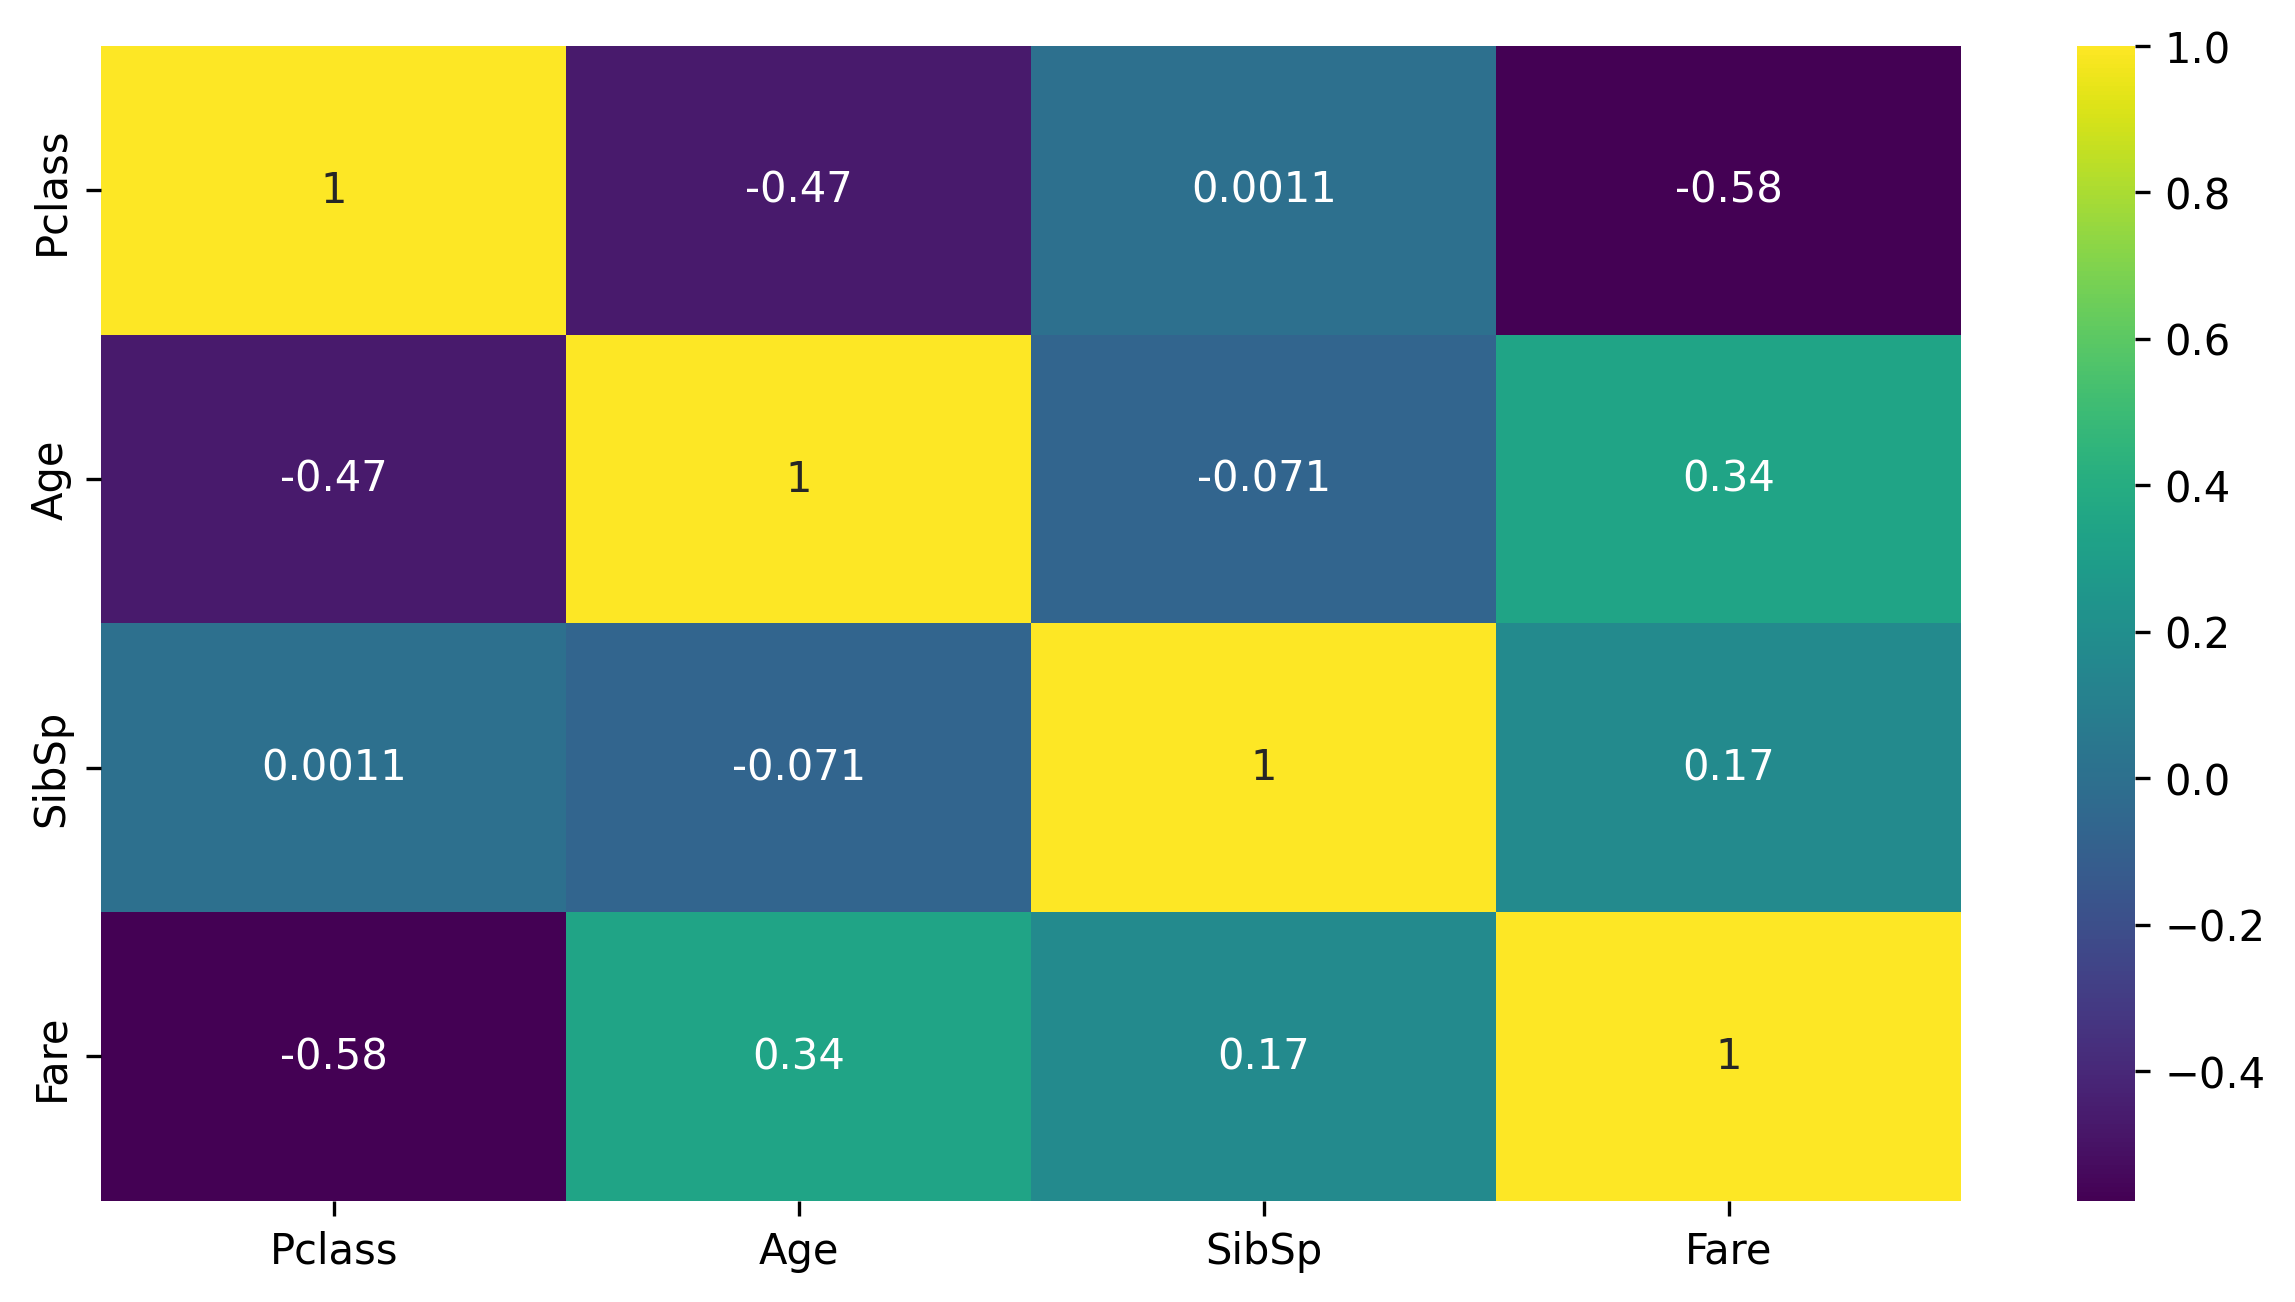

In [53]:
sns.heatmap(titanic_test_data.corr(numeric_only=True), annot=True, cmap='viridis')

In [54]:
titanic_train_data

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S
887,1,1,female,19.0,0,30.0000,S
888,0,3,female,27.0,1,23.4500,S
889,1,1,male,26.0,0,30.0000,C


In [55]:
titanic_test_data

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,male,34.5,0,7.8292,Q
1,3,female,47.0,1,7.0000,S
2,2,male,62.0,0,9.6875,Q
3,3,male,27.0,0,8.6625,S
4,3,female,22.0,1,12.2875,S
...,...,...,...,...,...,...
413,3,male,27.0,0,8.0500,S
414,1,female,39.0,0,108.9000,C
415,3,male,38.5,0,7.2500,S
416,3,male,27.0,0,8.0500,S


In [56]:
#Data preprocessing
##Encoding using pandas dummy function.
titanic_train_data=pd.get_dummies(data=titanic_train_data)
#titanic_train_data=pd.get_dummies(data=titanic_train_data, columns= ['Sex','Embarked'])
titanic_train_data

,Survived,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,7.2500,False,True,False,False,True
1,1,1,38.0,1,71.2833,True,False,True,False,False
2,1,3,26.0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,53.1000,True,False,False,False,True
4,0,3,35.0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,13.0000,False,True,False,False,True
887,1,1,19.0,0,30.0000,True,False,False,False,True
888,0,3,27.0,1,23.4500,True,False,False,False,True
889,1,1,26.0,0,30.0000,False,True,True,False,False


In [58]:
titanic_train_data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [59]:
titanic_test_data.columns

Index(['Pclass', 'Age', 'SibSp', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

Task 3: Model Building

In [60]:
titanic_train_data.head(4)

,Survived,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,7.2500,False,True,False,False,True
1,1,1,38.0,1,71.2833,True,False,True,False,False
2,1,3,26.0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,53.1000,True,False,False,False,True


In [61]:
x =titanic_train_data .iloc[:,1:]
x

,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,7.2500,False,True,False,False,True
1,1,38.0,1,71.2833,True,False,True,False,False
2,3,26.0,0,7.9250,True,False,False,False,True
3,1,35.0,1,53.1000,True,False,False,False,True
4,3,35.0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,13.0000,False,True,False,False,True
887,1,19.0,0,30.0000,True,False,False,False,True
888,3,27.0,1,23.4500,True,False,False,False,True
889,1,26.0,0,30.0000,False,True,True,False,False


In [62]:
y = titanic_train_data['Survived']
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [63]:
#Split the data.
from sklearn.model_selection import train_test_split
train_test_split(x,y,train_size=0.8)

[     Pclass   Age  SibSp      Fare  Sex_female  Sex_male  Embarked_C  \
 208       3  16.0      0    7.7500        True     False       False   
 57        3  28.5      0    7.2292       False      True        True   
 856       1  45.0      1  164.8667        True     False       False   
 641       1  24.0      0   69.3000        True     False        True   
 848       2  28.0      0   33.0000       False      True       False   
 ..      ...   ...    ...       ...         ...       ...         ...   
 723       2  50.0      0   13.0000       False      True       False   
 593       3  27.0      0    7.7500        True     False       False   
 252       1  62.0      0   26.5500       False      True       False   
 31        1  27.0      1  146.5208        True     False        True   
 827       2   1.0      0   37.0042       False      True        True   
 
      Embarked_Q  Embarked_S  
 208        True       False  
 57        False       False  
 856       False        True 

In [64]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)

LogisticRegression()

In [67]:
ypred = lg.predict(xtest)
ypred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [68]:
print(ytest[:25].values) #Actual
print(ypred[:25]) #Predicted

[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0]
[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0]


In [69]:
len(ypred)

179

Task 4: Model Evaluation

In [70]:
from sklearn.metrics import confusion_matrix, classification_report ,roc_auc_score,roc_curve

In [71]:
confusion_matrix(ytest,ypred) #Sequence -> tn, fp, fn, tp

array([[88, 17],
       [20, 54]])

<Axes: >

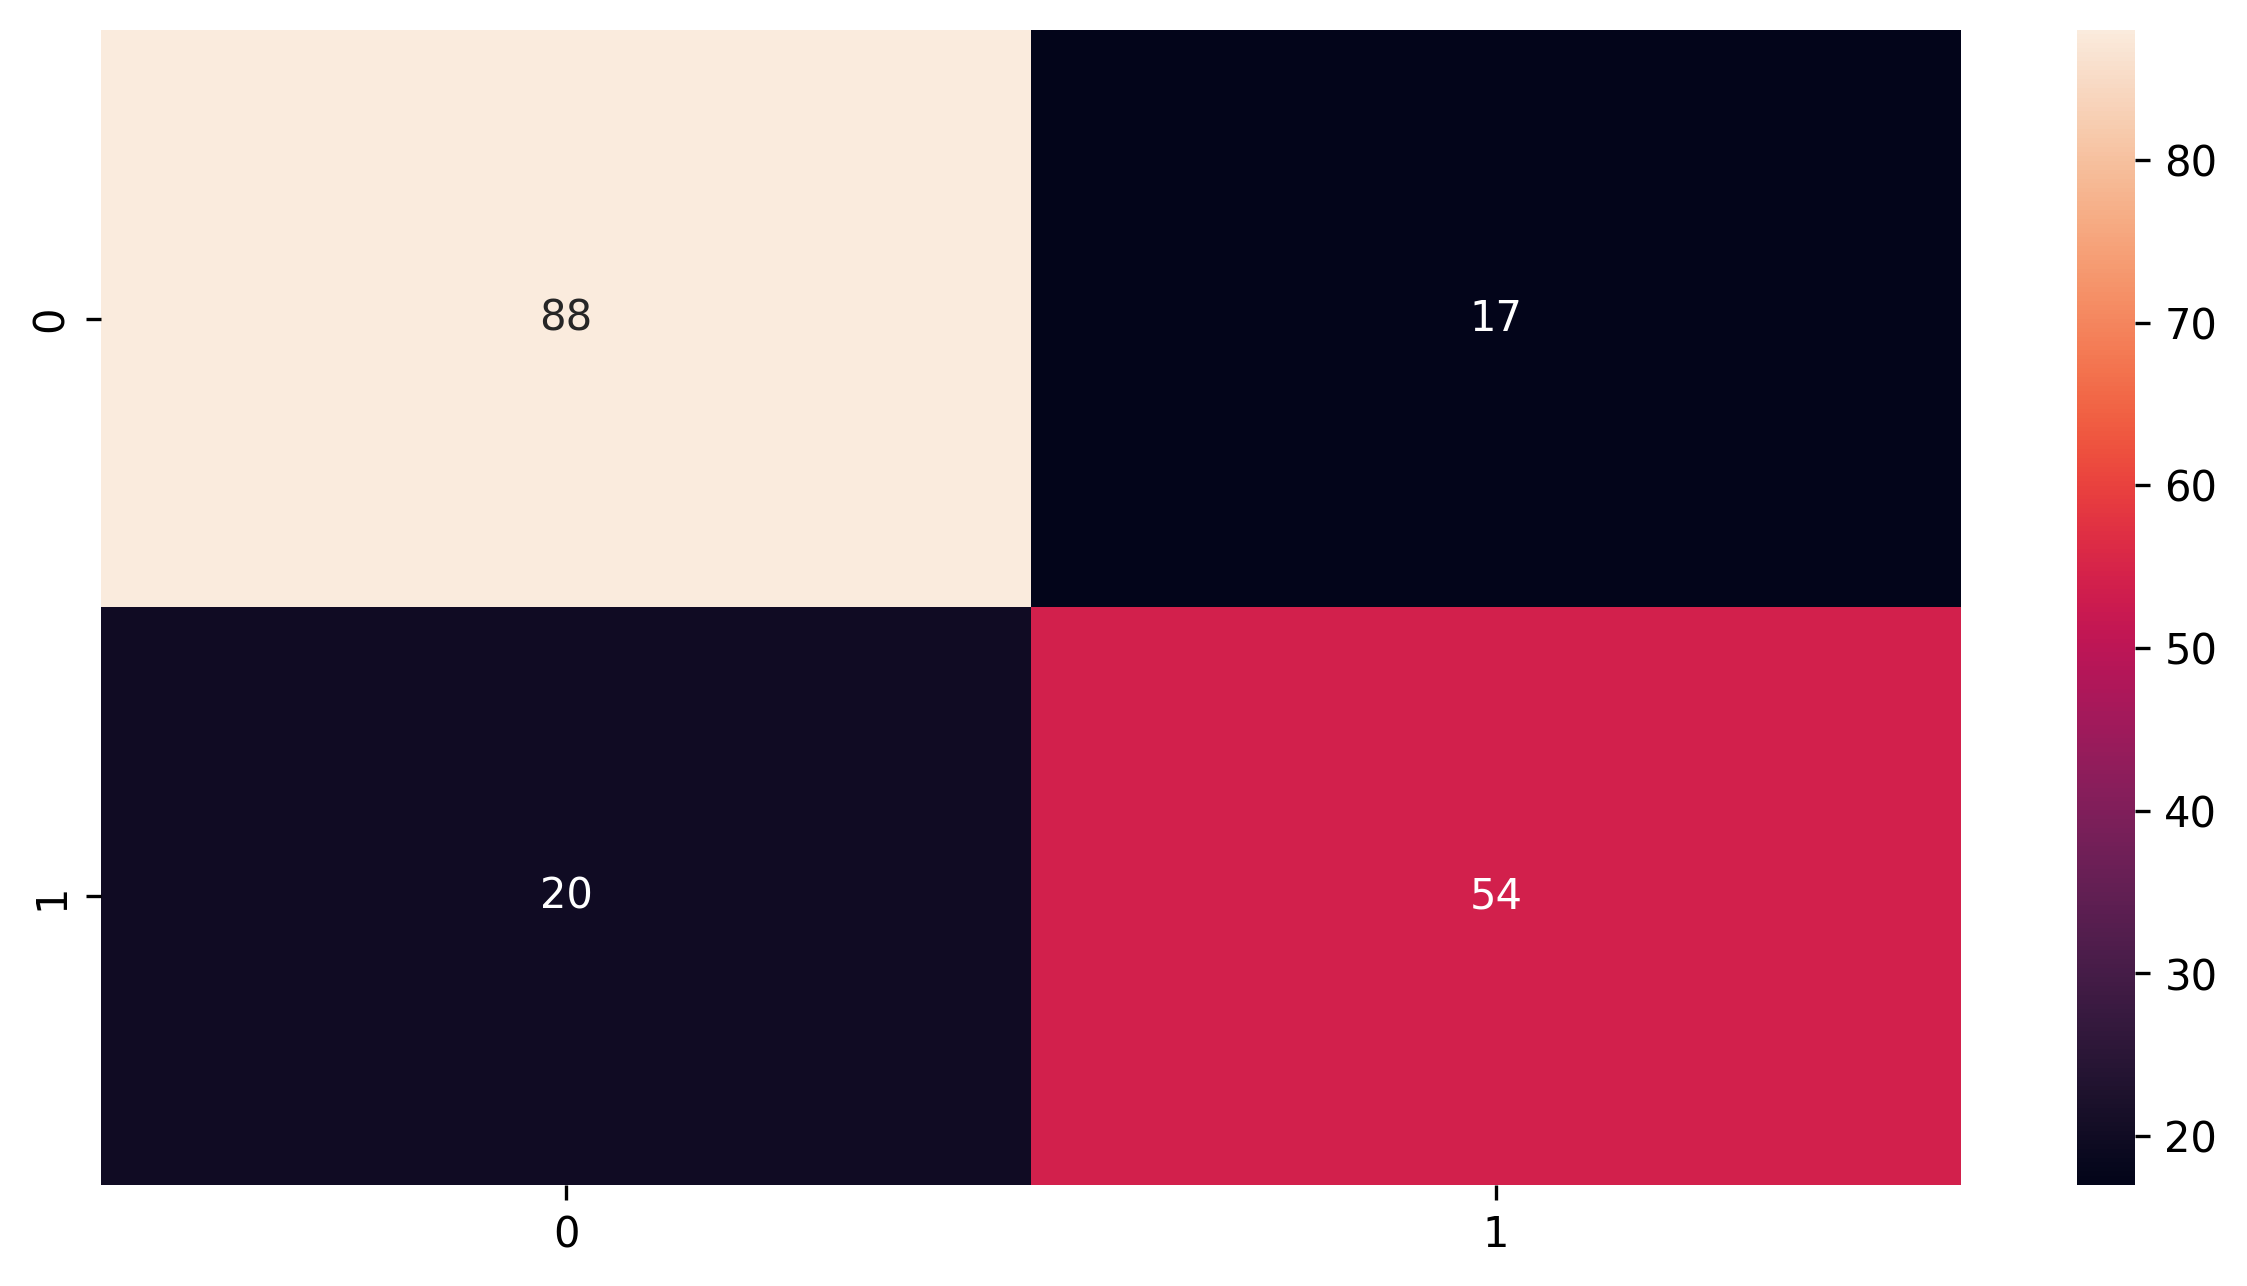

In [72]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True, fmt = 'g')

In [73]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



In [74]:
roc_auc=roc_auc_score(ytest,ypred)

In [75]:
print(f'ROC AUC :{roc_auc}')

ROC AUC :0.783912483912484


Task 5: Interpretation

In [79]:
#Coefficients
classifier = lg
coefficients = pd.DataFrame(classifier.coef_, columns=x.columns) # Changed 'Classifier' to 'classifier'
coefficients = coefficients.T # Transposed the DataFrame
coefficients.columns = ['Coefficient'] * len(coefficients.columns)# Renamed the column to 'Coefficient'
#The above line of code creates a list with the same length as the number of columns
# in the DataFrame, where each element is the string 'Coefficient'

In [80]:
coefficients

,Coefficient
Pclass,-0.917821
Age,-0.026751
SibSp,-0.339203
Fare,0.002450
Sex_female,1.948709
Sex_male,-0.699679
Embarked_C,0.647498
Embarked_Q,0.403879
Embarked_S,0.197653


Discuss Feature Significance

Features with higher absolute coefficients have a stronger impact on the model's predictions. The direction (positive or negative) indicates whether the feature increases or decreases the probability of survival.

Interview Questions:

1. What is the difference between precision and recall?

Ans:-

1. Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question: Of all the instances the model predicted as positive, how many were actually positive?

   High Precision means that when the model predicts a positive class, it is usually correct, indicating few false positives.

2. Recall: Recall (also known as Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations to all observations in the actual positive class. It answers the question: Of all the actual positive instances, how many did the model correctly identify?

   High Recall means the model correctly identifies most of the positive examples, indicating few false negatives.

Key Difference:

Precision focuses on the quality of the positive predictions (how accurate they are), while recall focuses on the ability to capture all positive instances.

There's often a trade-off between precision and recall; improving one may reduce the other.



2. What is cross-validation, and why is it important in binary classification?

Ans:-

Cross-Validation: Cross-validation is a technique used to assess the performance of a machine learning model by partitioning the data into subsets, training the model on some subsets (called training sets), and validating it on the remaining subsets (called validation sets). The most common type is k-fold cross-validation, where the data is split into k equal parts (folds), and the model is trained and validated k times, each time using a different fold as the validation set and the remaining k-1 folds as the training set.

Steps in k-Fold Cross-Validation: Split the data into k folds. Train the model on k-1 folds. Test the model on the remaining fold. Repeat this process k times, each time with a different fold as the test set. Average the performance across all k trials to get a more reliable estimate.

Importance in Binary Classification:

1. Reduces Overfitting: Cross-validation helps prevent the model from overfitting to a specific subset of data by ensuring that it is tested on different portions of the data.

2. Provides a More Robust Evaluation: By averaging the performance metrics (e.g., accuracy, precision, recall) across all folds, cross-validation provides a more reliable estimate of the model’s true performance on unseen data.

3. Maximizes Data Usage: Since every data point is used for both training and validation, cross-validation makes efficient use of the available data, which is especially important in binary classification when class imbalances might exist.

